In [1]:
# import all libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# hide warnings
import warnings
warnings.filterwarnings('ignore')


# Step 1. Reading and Understanding the data

In [2]:
#read dataset
train_df=pd.read_csv("train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.shape

(1460, 81)

There are total 1460 rows and 81 columns

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are some columns which might contains null values.
Lets check them.

In [5]:
#checking for null values
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
#checking datatypes
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


There are columns of all types , which can be check after data cleaning part is done where imputation of null values and outliers will be done

In [7]:
# statstical checks for numerical columns
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


###### Before handling null values / data cleaning lets map columns to their correct datatypes

In [8]:
train_df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [9]:
train_df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [10]:
train_df['OverallCond'].unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

In [11]:
#changing num to categorical so as to form these as dummy variables 
train_df['MSSubClass']=train_df['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

train_df['OverallQual']=train_df['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
train_df['OverallCond']=train_df['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

Now all columns map to correct datatypes

###### There is columns which holds year in the format(YYYY), it will be good if we change them into age (as Present year - Year)

In [12]:
# Converting years to age
train_df['YearBuilt_Age'] = train_df['YearBuilt'].max() - train_df['YearBuilt']
train_df['YearRemodAdd_Age'] = train_df['YearRemodAdd'].max() - train_df['YearRemodAdd']
train_df['YrSold_Age'] = train_df['YrSold'].max() - train_df['YrSold']
train_df['GarageYrBlt_Age'] = train_df['GarageYrBlt'].max() - train_df['GarageYrBlt']

# Dropping columns
train_df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [13]:
train_df[['YearBuilt_Age','YearRemodAdd_Age','YrSold_Age','GarageYrBlt_Age']].head(10)

,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,7,7,2,7.0
1,34,34,3,34.0
2,9,8,2,9.0
3,95,40,4,12.0
4,10,10,2,10.0
5,17,15,1,17.0
6,6,5,3,6.0
7,37,37,1,37.0
8,79,60,2,79.0
9,71,60,2,71.0


# Step 2. Data Cleaning

Dropping/Imputation of the columns/rows will be done for null values and outliers.

In [14]:
#checking percentage for the null values
nullColumns=round(train_df.isnull().sum()*100/train_df.shape[0],2)
nullColumns=nullColumns[nullColumns>0]
nullColumns

LotFrontage        17.74
Alley              93.77
MasVnrType          0.55
MasVnrArea          0.55
BsmtQual            2.53
BsmtCond            2.53
BsmtExposure        2.60
BsmtFinType1        2.53
BsmtFinType2        2.60
Electrical          0.07
FireplaceQu        47.26
GarageType          5.55
GarageFinish        5.55
GarageQual          5.55
GarageCond          5.55
PoolQC             99.52
Fence              80.75
MiscFeature        96.30
GarageYrBlt_Age     5.55
dtype: float64

In [15]:
# Columns having high percentage of missing values > 45 
nullColumns=nullColumns[nullColumns> 45]
nullColumns

Alley          93.77
FireplaceQu    47.26
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

In [16]:
# lets drop this columns from the data, as 90% of the data is missing
train_df.drop(labels=nullColumns.index,axis=1,inplace=True)

In [17]:
#after dropping columns
train_df.shape

(1460, 76)

Now there are 76 columns are present.

After dropping the columns having missing values more than 45%, its time to compute each columns one by one. 

In [18]:
nullColumns=round(train_df.isnull().sum()*100/train_df.shape[0],2)
nullColumns=nullColumns[nullColumns>0]
nullColumns

LotFrontage        17.74
MasVnrType          0.55
MasVnrArea          0.55
BsmtQual            2.53
BsmtCond            2.53
BsmtExposure        2.60
BsmtFinType1        2.53
BsmtFinType2        2.60
Electrical          0.07
GarageType          5.55
GarageFinish        5.55
GarageQual          5.55
GarageCond          5.55
GarageYrBlt_Age     5.55
dtype: float64

These are the following columns that we have to compute.

### Checking and imputing categorical values

##### 1. MasVnrType
Masonry veneer type

In [19]:
train_df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [20]:
train_df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [21]:
#Checking for percantage of distibution
MVTCol=(train_df['MasVnrType'].value_counts()*100)/train_df.shape[0]
MVTCol

None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

In [22]:
#It can be seen than, "None" category is coming the most times , hence replacing NaN value with value this.
train_df['MasVnrType'] = train_df['MasVnrType'].fillna("None")

##### 2. BsmtQual
Evaluates the height of the basement 


In [23]:
train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [24]:
# As we check the details for the columns, its seems that NA/null value is actually considered to be No Basement present.
#Therefore replacing NA/null value with NB - No Basement
train_df['BsmtQual'] = train_df['BsmtQual'].fillna("NB")

##### 3. BsmtCond
Evaluates the general condition of the basement

In [25]:
train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [26]:
# As we check the details for the columns, its seems that NA/null value is actually considered to be No Basement.
#Therefore replacing NA/null value with NB - No Basement
train_df['BsmtCond'] = train_df['BsmtCond'].fillna("NB")

##### 4. BsmtExposure
Refers to walkout or garden level walls

In [27]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [28]:
# As we check the details for the columns, its seems that NA/null value is actually considered to be No Basement.
#Therefore replacing NA/null value with NB - No Basement
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna("NB")

##### 5. BsmtFinType1
Rating of basement finished area

In [29]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [30]:
# As we check the details for the columns, its seems that NA/null value is actually considered to be No Basement.
#Therefore replacing NA/null value with NB - No Basement
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna("NB")

##### 6. BsmtFinType2
Rating of basement finished area (if multiple types)

In [31]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [32]:
# As we check the details for the columns, its seems that NA/null value is actually considered to be No Basement.
#Therefore replacing NA/null value with NB - No Basement
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna("NB")

##### 7. Electrical
Electrical system

In [33]:
train_df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [34]:
train_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [35]:
#Checking for percantage of distibution
ElectricalCol=(train_df['Electrical'].value_counts()*100)/train_df.shape[0]
ElectricalCol

SBrkr    91.369863
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64

In [36]:
#It can be seen than, "SBrkr" category is coming the most times , hence replacing NaN value with value this.
train_df['Electrical'] = train_df['Electrical'].fillna("SBrkr")

##### 8. GarageType
Garage location

In [37]:
train_df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [38]:
# As we check the details for the columns, its seems that NA/null value is actually considered to be No Garage.
#Therefore replacing NA/null value with NG - No Garage
train_df['GarageType'] = train_df['GarageType'].fillna("NG")

##### 9. GarageFinish 
Interior finish of the garage

In [39]:
train_df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [40]:
# As we check the details for the columns, its seems that NA/null value is actually considered to be No Garage.
#Therefore replacing NA/null value with NG - No Garage
train_df['GarageFinish'] = train_df['GarageFinish'].fillna("NG")

##### 10. GarageQual
Garage quality

In [41]:
train_df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [42]:
# As we check the details for the columns, its seems that NA/null value is actually considered to be No Garage.
#Therefore replacing NA/null value with NG - No Garage
train_df['GarageQual'] = train_df['GarageQual'].fillna("NG")

##### 11. GarageCond
Garage condition

In [43]:
train_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [44]:
# As we check the details for the columns, its seems that NA/null value is actually considered to be No Garage.
#Therefore replacing NA/null value with NG - No Garage
train_df['GarageCond'] = train_df['GarageCond'].fillna("NG")

### Checking and imputing numerical values

##### 1. LotFrontage
Linear feet of street connected to property

In [45]:
train_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage'>

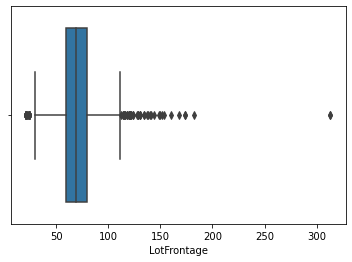

In [46]:
sns.boxplot(train_df['LotFrontage'])

In [47]:
train_df['LotFrontage'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
5%         34.000000
25%        59.000000
50%        69.000000
75%        80.000000
90%        96.000000
95%       107.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [48]:
# imputing the null value with median of the column
train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(), inplace=True)

##### 2. MasVnrArea
Masonry veneer area in square feet

In [49]:
train_df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<AxesSubplot:xlabel='MasVnrArea'>

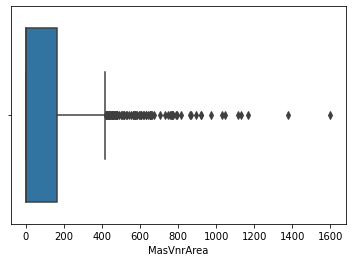

In [50]:
sns.boxplot(train_df['MasVnrArea'])

In [51]:
train_df['MasVnrArea'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%       166.000000
90%       335.000000
95%       456.000000
99%       791.920000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [52]:
# imputing the null value with median of the column
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].median(), inplace=True)

##### 3. GarageYrBlt
Year garage was built

In [53]:
train_df['GarageYrBlt_Age'].describe()

count    1379.000000
mean       31.493836
std        24.689725
min         0.000000
25%         8.000000
50%        30.000000
75%        49.000000
max       110.000000
Name: GarageYrBlt_Age, dtype: float64

<AxesSubplot:xlabel='GarageYrBlt_Age'>

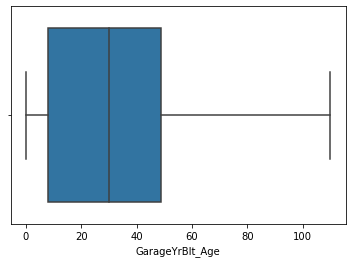

In [54]:
sns.boxplot(train_df['GarageYrBlt_Age'])

In [55]:
# imputing the null value with median of the column
train_df['GarageYrBlt_Age'].fillna(train_df['GarageYrBlt_Age'].median(), inplace=True)

#### Checking for null values

In [56]:
#checking for null values
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBa

 Data Cleaning is done ,  No Null Values are present.

# Step 3. EDA

#### 3.1 Univariate Analysis
##### - Categorical Variables

In [57]:
Cat_df = train_df.select_dtypes(include=['object'])
Cat_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

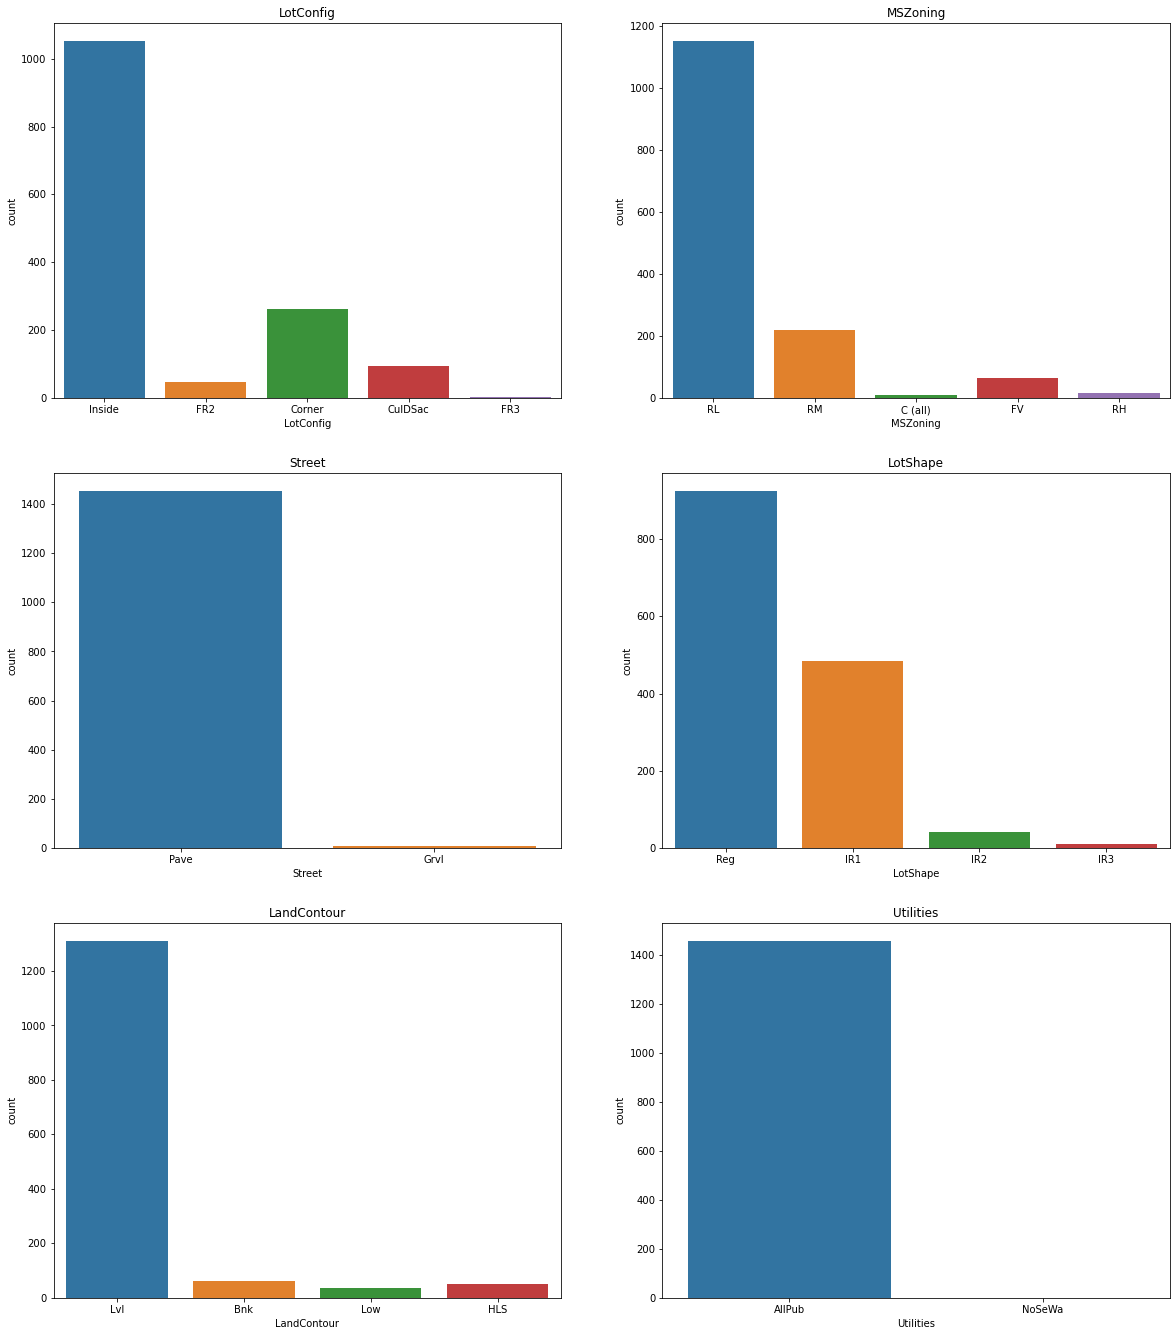

In [58]:
plt.figure(figsize = (20,40))

plt.subplot(5,2,1)
sns.countplot(train_df['LotConfig'])
plt.title('LotConfig')

plt.subplot(5,2,2)
sns.countplot(train_df['MSZoning'])
plt.title('MSZoning')

plt.subplot(5,2,3)
sns.countplot(train_df['Street'])
plt.title('Street')

plt.subplot(5,2,4)
sns.countplot(train_df['LotShape'])
plt.title('LotShape')

plt.subplot(5,2,5)
sns.countplot(train_df['LandContour'])
plt.title('LandContour')

plt.subplot(5,2,6)
sns.countplot(train_df['Utilities'])
plt.title('Utilities')


plt.show()

### Observations
Its seems that many types of different columns have very less share , hence checking percentage of distribution for the columns values individually

##### 1. LotConfig

In [59]:
#Checking for percantage of distibution
train_df['LotConfig'].value_counts()*100/train_df.shape[0]

Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64

As we can see, the remaining LotConfig types (which is less than 5 %) have very less collectively share, less than 10% , so we can merge all this into one single type as Others, which can be helpful for observations.

In [60]:
train_df['LotConfig'] = train_df['LotConfig'].replace(['FR2','FR3'],'Others')

In [61]:
#Checking for percantage of distibution
train_df['LotConfig'].value_counts()*100/train_df.shape[0]

Inside     72.054795
Corner     18.013699
CulDSac     6.438356
Others      3.493151
Name: LotConfig, dtype: float64

###### 2. MSZoning

In [62]:
#Checking for percantage of distibution
train_df['MSZoning'].value_counts()*100/train_df.shape[0]

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

As we can see, the remaining MSZoning types (which is less than 10 %) have very less collectively share, less than 10% , so we can merge all this into one single type as Others, which can be helpful for observations.

In [63]:
train_df['MSZoning'] = train_df['MSZoning'].replace(['FV','RH','C (all)'],'Others')

In [64]:
#Checking for percantage of distibution
train_df['MSZoning'].value_counts()*100/train_df.shape[0]

RL        78.835616
RM        14.931507
Others     6.232877
Name: MSZoning, dtype: float64

##### 3. Street

In [65]:
#Checking for percantage of distibution
train_df['Street'].value_counts()*100/train_df.shape[0]

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64

As we can see, the column - Street, is highly skewed i.e. column Pave,  having more than 99% , therefore have not much significance on the model. Therefore dropping the column.

In [66]:
# dropping the column from the data
train_df.drop(labels='Street',axis=1,inplace=True)

##### 4. LotShape

In [67]:
#Checking for percantage of distibution
train_df['LotShape'].value_counts()*100/train_df.shape[0]

Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64

As we can see, the remaining LotShape types (which is less than 10 %) have very less collectively share, less than 10% , so we can merge all this into one single type as Others, which can be helpful for observations.

In [68]:
train_df['LotShape'] = train_df['LotShape'].replace(['IR2','IR3'],'Others')

In [69]:
#Checking for percantage of distibution
train_df['LotShape'].value_counts()*100/train_df.shape[0]

Reg       63.356164
IR1       33.150685
Others     3.493151
Name: LotShape, dtype: float64

##### 5. LandContour

In [70]:
#Checking for percantage of distibution
train_df['LandContour'].value_counts()*100/train_df.shape[0]

Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64

As we can see, the remaining LotContour types (which is less than 10 %) have very less collectively share, similar 10% , so we can merge all this into one single type as Others, which can be helpful for observations.

In [71]:
train_df['LandContour'] = train_df['LandContour'].replace(['Bnk','HLS','Low'],'Others')

In [72]:
#Checking for percantage of distibution
train_df['LandContour'].value_counts()*100/train_df.shape[0]

Lvl       89.794521
Others    10.205479
Name: LandContour, dtype: float64

##### 6. Utilities

In [73]:
#Checking for percantage of distibution
train_df['Utilities'].value_counts()*100/train_df.shape[0]

AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64

As we can see, the column - Utilities, is highly skewed i.e. column Pave, having more than 99% , therefore have not much significance on the model. Therefore dropping the column.

In [74]:
# dropping the column from the data
train_df.drop(labels='Utilities',axis=1,inplace=True)

In [75]:
# defining function for drawing subplot for analysing categorical variables 
def drawUnivariateCatPlot(catList):
    plt.figure(figsize = (20,40))
    for i in catList:
        plt.subplot(5,2,catList.index(i)+1)
        sns.countplot(train_df[i])
        plt.xticks(rotation=60)
    plt.show()

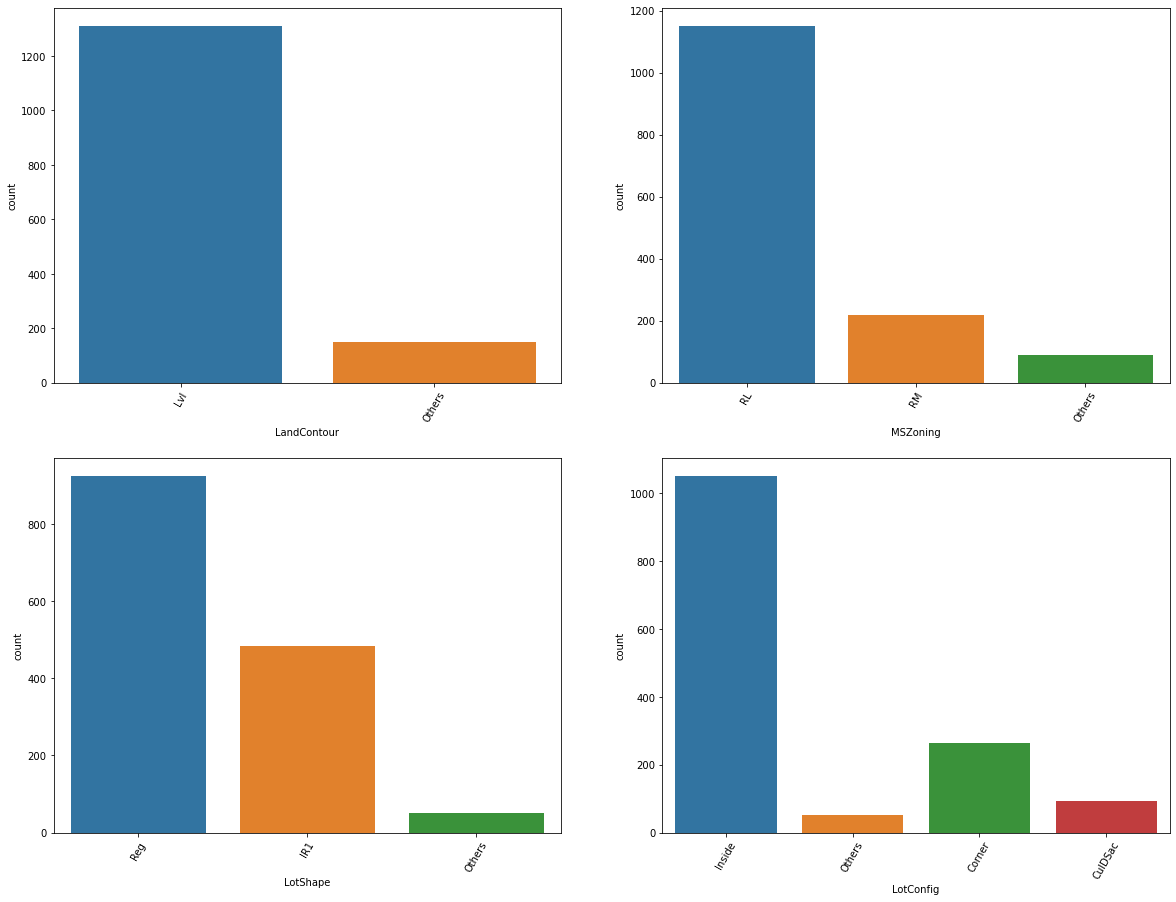

In [76]:
catList1=['LandContour','MSZoning','LotShape','LotConfig']
drawUnivariateCatPlot(catList1)

- Observation
1. Most of the property are nearly flat.
2. Most of the zone for sale property is Residential Low Density. 
3. Size of the property is mostly regular.
4. The property which is for sale is mostly are inside lot

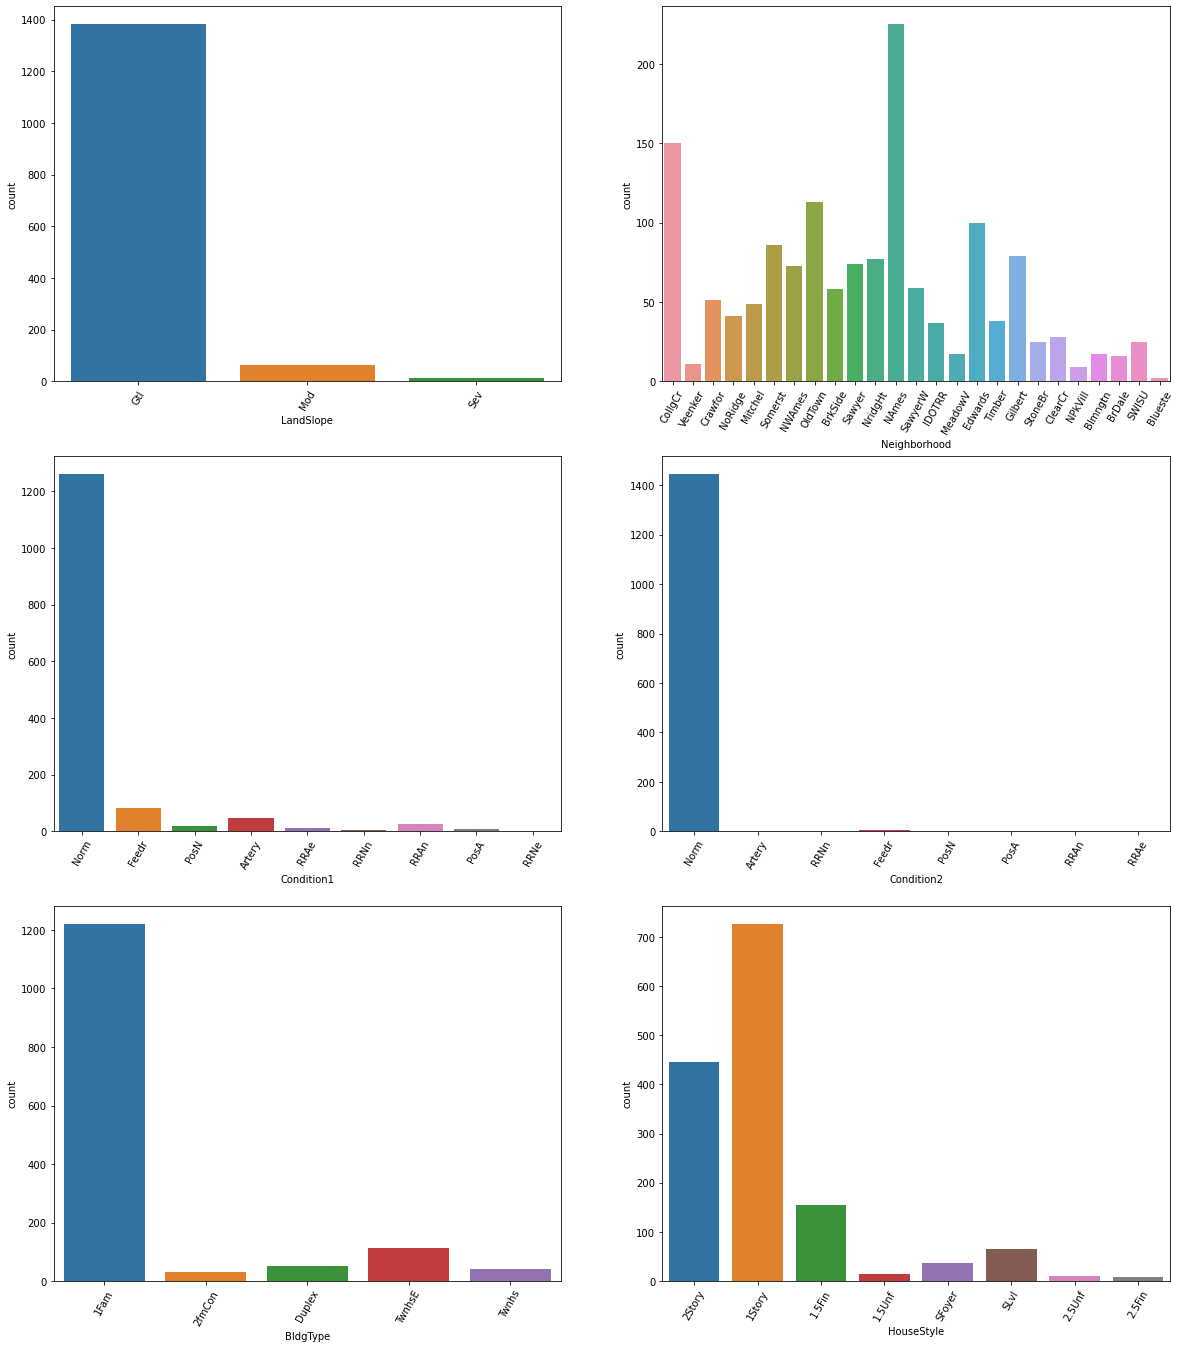

In [77]:
catList2=['LandSlope', 'Neighborhood', 'Condition1','Condition2', 'BldgType', 'HouseStyle']
drawUnivariateCatPlot(catList2)

Its seems that many types of different columns have very less share , hence checking percentage of distribution for the columns values individually

##### 1. Land Slope

In [78]:
#Checking for percantage of distibution
train_df['LandSlope'].value_counts()*100/train_df.shape[0]

Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64

As we can see, the column - Land Slope, is highly skewed i.e. column Pave, almost 95% , therefore have not much significance on the model. Therefore dropping the column.

In [79]:
# dropping the column from the data
train_df.drop(labels='LandSlope',axis=1,inplace=True)

##### 2. Condition1

In [80]:
#Checking for percantage of distibution
train_df['Condition1'].value_counts()*100/train_df.shape[0]

Norm      86.301370
Feedr      5.547945
Artery     3.287671
RRAn       1.780822
PosN       1.301370
RRAe       0.753425
PosA       0.547945
RRNn       0.342466
RRNe       0.136986
Name: Condition1, dtype: float64

As we can see, the remaining Condition1 types (which is less than 5 %) have very less collectively share, similar 10% , so we can merge all this into one single type as Others, which can be helpful for observations.

In [81]:
train_df['Condition1'] = train_df['Condition1'].replace(['Artery','RRAn','PosN','RRAe','PosA','RRNn','RRNe'],'Others')

In [82]:
#Checking for percantage of distibution
train_df['Condition1'].value_counts()*100/train_df.shape[0]

Norm      86.301370
Others     8.150685
Feedr      5.547945
Name: Condition1, dtype: float64

##### 3. Condition2

In [83]:
#Checking for percantage of distibution
train_df['Condition2'].value_counts()*100/train_df.shape[0]

Norm      98.972603
Feedr      0.410959
Artery     0.136986
RRNn       0.136986
PosN       0.136986
RRAe       0.068493
PosA       0.068493
RRAn       0.068493
Name: Condition2, dtype: float64

As we can see, the column - Condition2, is highly skewed i.e. column Pave, more than 98% , therefore have not much significance on the model. Therefore dropping the column.

In [84]:
# dropping the column from the data
train_df.drop(labels='Condition2',axis=1,inplace=True)

##### 4. BldgType

In [85]:
#Checking for percantage of distibution
train_df['BldgType'].value_counts()*100/train_df.shape[0]

1Fam      83.561644
TwnhsE     7.808219
Duplex     3.561644
Twnhs      2.945205
2fmCon     2.123288
Name: BldgType, dtype: float64

As we can see, the remaining BldgType types (which is less than 5 %) have very less collectively share, similar 10% , so we can merge all this into one single type as Others, which can be helpful for observations.

In [86]:
train_df['BldgType'] = train_df['BldgType'].replace(['Duplex','Twnhs','2fmCon'],'Others')

In [87]:
#Checking for percantage of distibution
train_df['BldgType'].value_counts()*100/train_df.shape[0]

1Fam      83.561644
Others     8.630137
TwnhsE     7.808219
Name: BldgType, dtype: float64

##### 5. HouseStyle

In [88]:
#Checking for percantage of distibution
train_df['HouseStyle'].value_counts()*100/train_df.shape[0]

1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
SLvl       4.452055
SFoyer     2.534247
1.5Unf     0.958904
2.5Unf     0.753425
2.5Fin     0.547945
Name: HouseStyle, dtype: float64

As we can see, the remaining HouseStyle types (which is less than 5 %) have very less collectively share, less than 10% , so we can merge all this into one single type as Others, which can be helpful for observations.

In [89]:
train_df['HouseStyle'] = train_df['HouseStyle'].replace(['SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')

In [90]:
#Checking for percantage of distibution
train_df['HouseStyle'].value_counts()*100/train_df.shape[0]

1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
Others     9.246575
Name: HouseStyle, dtype: float64

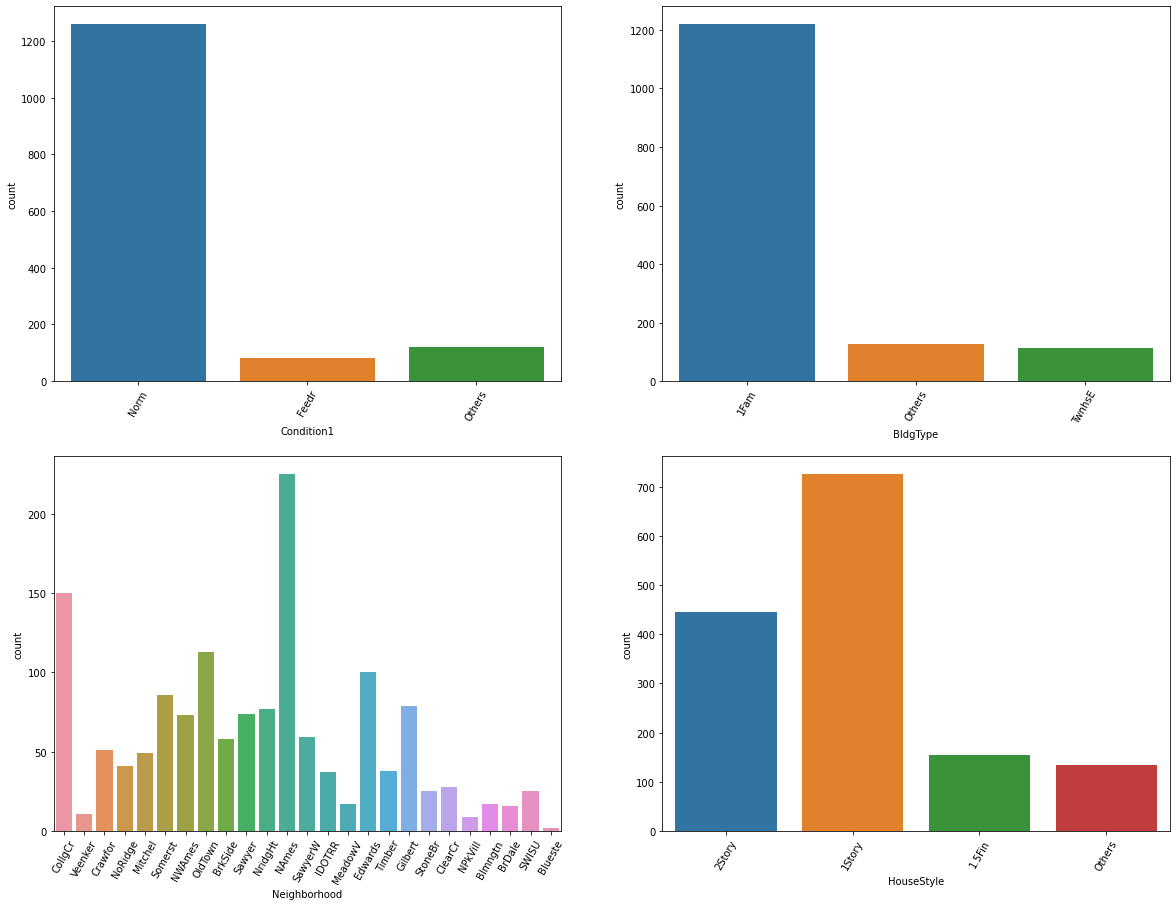

In [91]:
catList2=[ 'Condition1', 'BldgType','Neighborhood', 'HouseStyle']
drawUnivariateCatPlot(catList2)

- Observations
1. Most of the neighborhood of the property are either North Ames or College Creek.
2. Most of the house styles are either 1 story or 2 story.

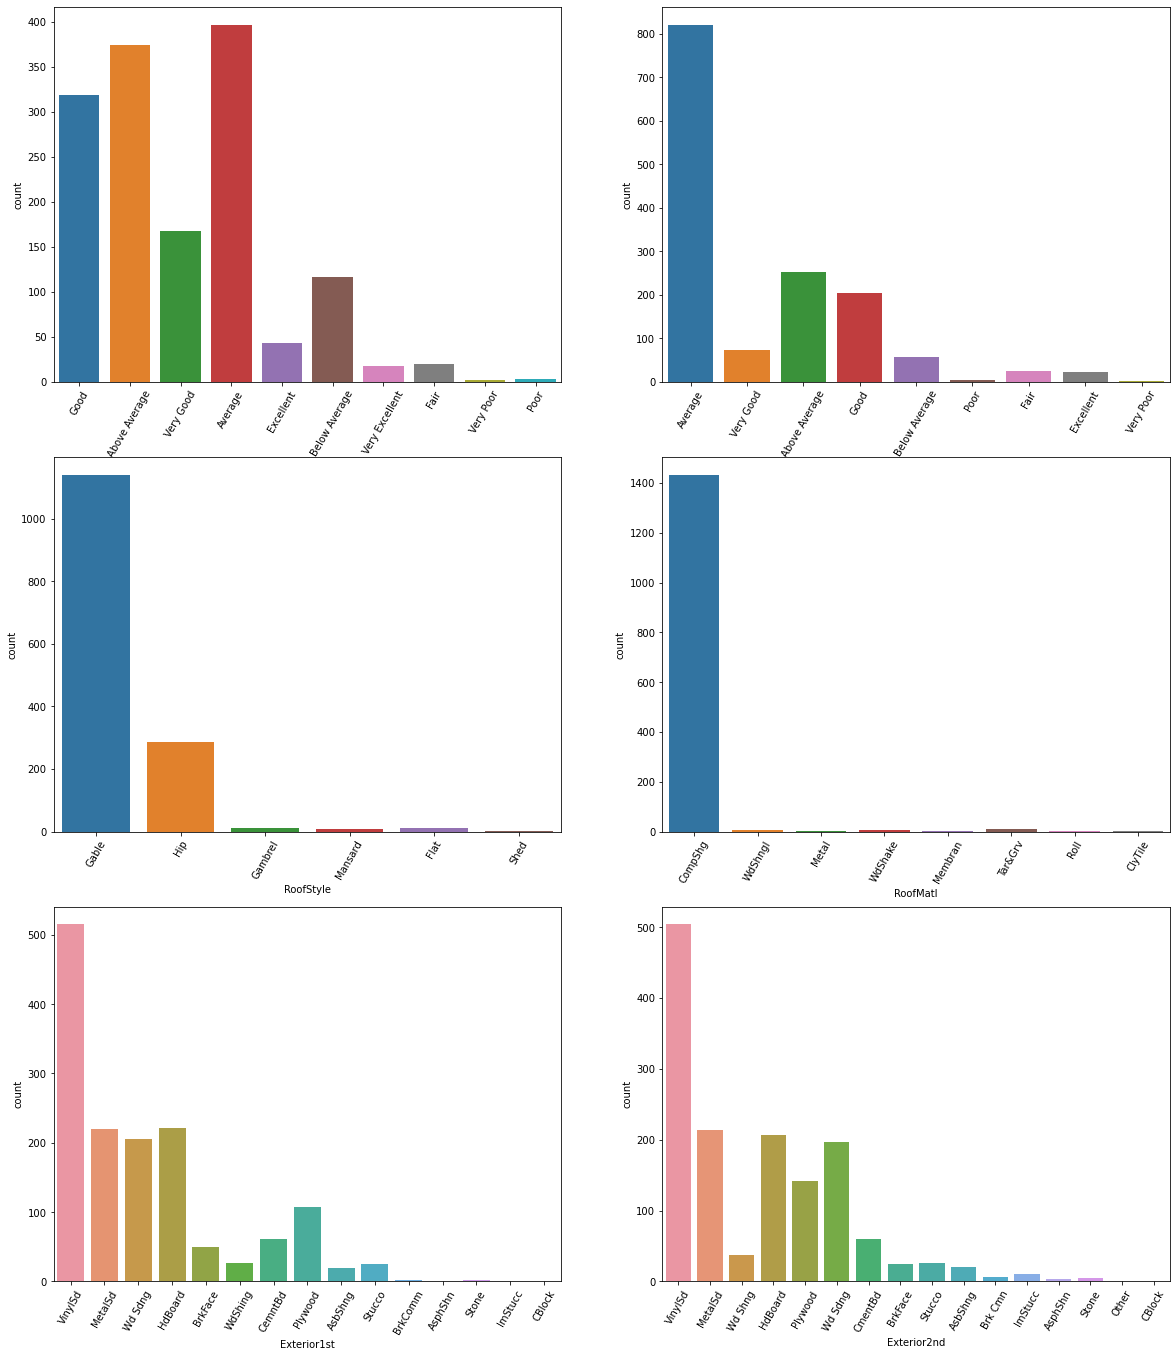

In [92]:
catList3=['OverallQual', 'OverallCond','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd']
drawUnivariateCatPlot(catList3)

Its seems that many types of different columns have very less share , hence checking percentage of distribution for the columns values individually

##### 1. OverallQual

In [93]:
#Checking for percantage of distibution
train_df['OverallQual'].value_counts()*100/train_df.shape[0]

Average           27.191781
Above Average     25.616438
Good              21.849315
Very Good         11.506849
Below Average      7.945205
Excellent          2.945205
Fair               1.369863
Very Excellent     1.232877
Poor               0.205479
Very Poor          0.136986
Name: OverallQual, dtype: float64

In [94]:
train_df['OverallQual'] = train_df['OverallQual'].replace(['Excellent','Very Excellent'],'Excellent')
train_df['OverallQual'] = train_df['OverallQual'].replace(['Fair','Poor','Very Poor'],'Others')

In [95]:
#Checking for percantage of distibution
train_df['OverallQual'].value_counts()*100/train_df.shape[0]

Average          27.191781
Above Average    25.616438
Good             21.849315
Very Good        11.506849
Below Average     7.945205
Excellent         4.178082
Others            1.712329
Name: OverallQual, dtype: float64

##### 2. OverallCond

In [96]:
#Checking for percantage of distibution
train_df['OverallCond'].value_counts()*100/train_df.shape[0]

Average          56.232877
Above Average    17.260274
Good             14.041096
Very Good         4.931507
Below Average     3.904110
Fair              1.712329
Excellent         1.506849
Poor              0.342466
Very Poor         0.068493
Name: OverallCond, dtype: float64

As we can see, the remaining some types (which is less than 1 %) have very less collectively share, 
considering -> Poor , Very Poor = Poor

In [97]:
train_df['OverallCond'] = train_df['OverallCond'].replace(['Poor','Very Poor'],'Poor')

In [98]:
#Checking for percantage of distibution
train_df['OverallCond'].value_counts()*100/train_df.shape[0]

Average          56.232877
Above Average    17.260274
Good             14.041096
Very Good         4.931507
Below Average     3.904110
Fair              1.712329
Excellent         1.506849
Poor              0.410959
Name: OverallCond, dtype: float64

##### 3. RoofStyle

In [99]:
#Checking for percantage of distibution
train_df['RoofStyle'].value_counts()*100/train_df.shape[0]

Gable      78.150685
Hip        19.589041
Flat        0.890411
Gambrel     0.753425
Mansard     0.479452
Shed        0.136986
Name: RoofStyle, dtype: float64

As we can see, the remaining some types (which is less than 1 %) have very less collectively share, therefore merging them as Others 

In [100]:
train_df['RoofStyle'] = train_df['RoofStyle'].replace(['Flat','Gambrel','Mansard','Shed'],'Others')

In [101]:
#Checking for percantage of distibution
train_df['RoofStyle'].value_counts()*100/train_df.shape[0]

Gable     78.150685
Hip       19.589041
Others     2.260274
Name: RoofStyle, dtype: float64

##### 4. RoofMatl

In [102]:
#Checking for percantage of distibution
train_df['RoofMatl'].value_counts()*100/train_df.shape[0]

CompShg    98.219178
Tar&Grv     0.753425
WdShngl     0.410959
WdShake     0.342466
Membran     0.068493
Roll        0.068493
Metal       0.068493
ClyTile     0.068493
Name: RoofMatl, dtype: float64

As we can see, the column - RoofMatl, is highly skewed i.e. column CompShg, almost 98% , therefore have not much significance on the model. Therefore dropping the column

In [103]:
# dropping the column from the data
train_df.drop(labels='RoofMatl',axis=1,inplace=True)

##### 5. Exterior1st

In [104]:
#Checking for percantage of distibution
train_df['Exterior1st'].value_counts()*100/train_df.shape[0]

VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
CemntBd     4.178082
BrkFace     3.424658
WdShing     1.780822
Stucco      1.712329
AsbShng     1.369863
BrkComm     0.136986
Stone       0.136986
ImStucc     0.068493
CBlock      0.068493
AsphShn     0.068493
Name: Exterior1st, dtype: float64

As we can see, the remaining some types (which is less than 2 %) have very less collectively share, therefore merging them as Others

In [105]:
train_df['Exterior1st'] = train_df['Exterior1st'].replace(['WdShing','Stucco','AsbShng','BrkComm','Stone','CBlock','AsphShn','ImStucc'],'Others')

In [106]:
#Checking for percantage of distibution
train_df['Exterior1st'].value_counts()*100/train_df.shape[0]

VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
Others      5.342466
CemntBd     4.178082
BrkFace     3.424658
Name: Exterior1st, dtype: float64

##### 6. Exterior2nd

In [107]:
#Checking for percantage of distibution
train_df['Exterior2nd'].value_counts()*100/train_df.shape[0]

VinylSd    34.520548
MetalSd    14.657534
HdBoard    14.178082
Wd Sdng    13.493151
Plywood     9.726027
CmentBd     4.109589
Wd Shng     2.602740
Stucco      1.780822
BrkFace     1.712329
AsbShng     1.369863
ImStucc     0.684932
Brk Cmn     0.479452
Stone       0.342466
AsphShn     0.205479
Other       0.068493
CBlock      0.068493
Name: Exterior2nd, dtype: float64

As we can see, the remaining some types (which is less than 2 %) have very less collectively share, therefore merging them as Others similar as Exterior1st column

In [108]:
train_df['Exterior2nd'] = train_df['Exterior2nd'].replace(['WdShing','Stucco','AsbShng','BrkComm','Stone','CBlock','AsphShn','ImStucc','Other'],'Others')

In [109]:
#Checking for percantage of distibution
train_df['Exterior2nd'].value_counts()*100/train_df.shape[0]

VinylSd    34.520548
MetalSd    14.657534
HdBoard    14.178082
Wd Sdng    13.493151
Plywood     9.726027
Others      4.520548
CmentBd     4.109589
Wd Shng     2.602740
BrkFace     1.712329
Brk Cmn     0.479452
Name: Exterior2nd, dtype: float64

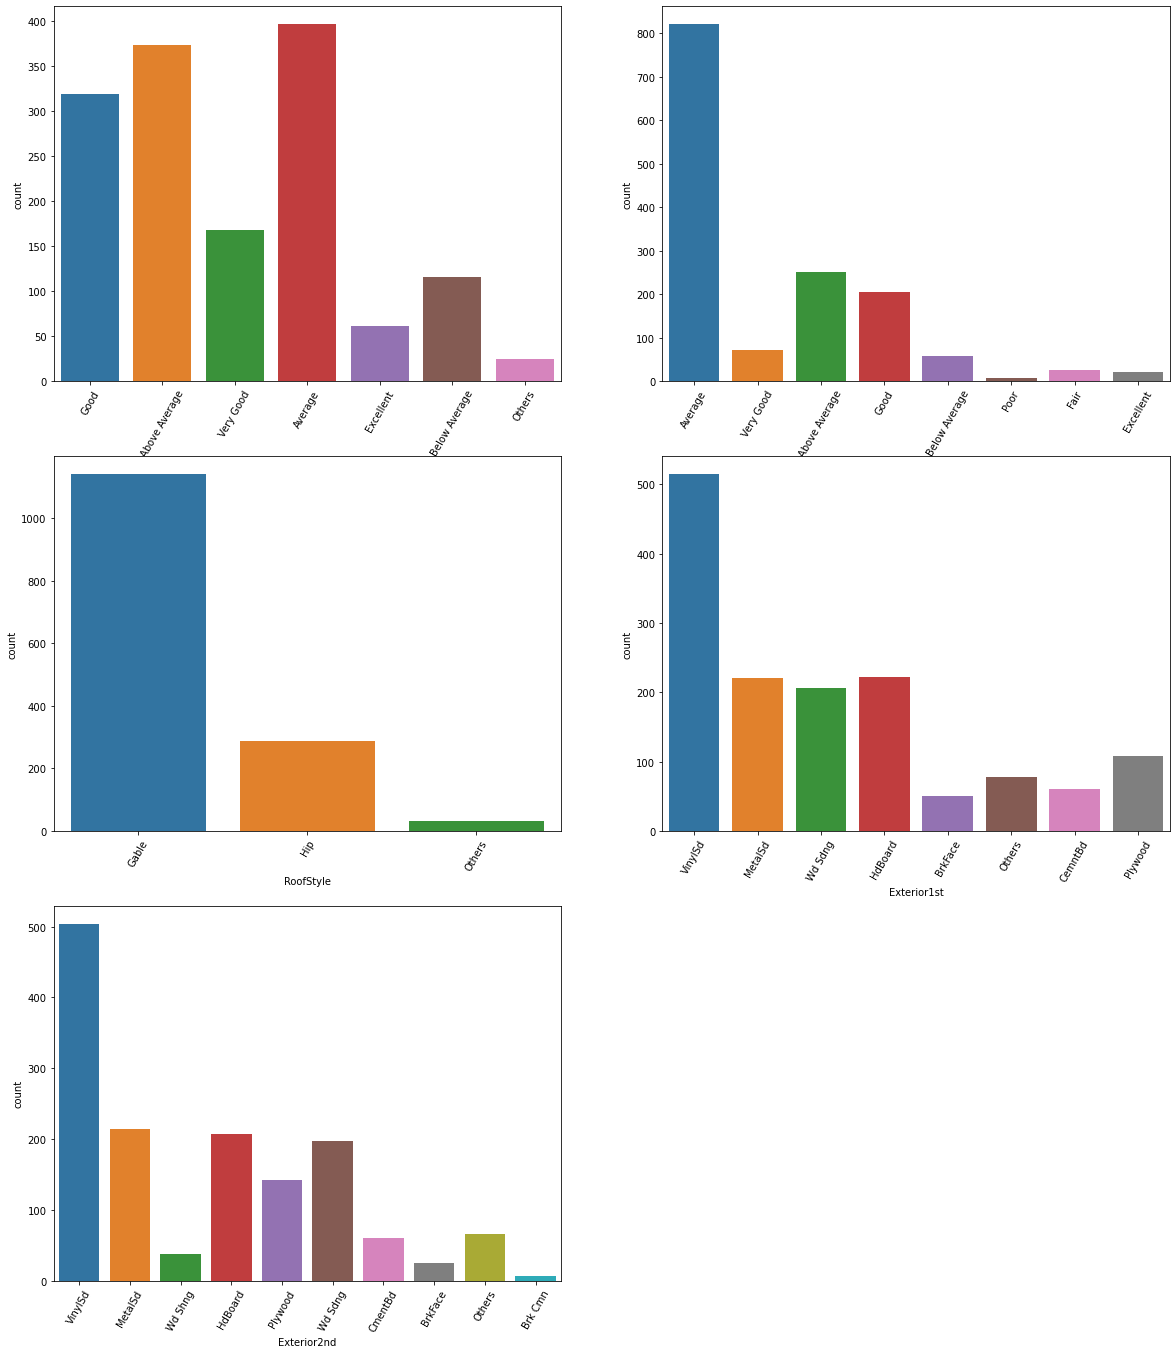

In [110]:
catList3=['OverallQual', 'OverallCond','RoofStyle', 'Exterior1st', 'Exterior2nd']
drawUnivariateCatPlot(catList3)

- Observations
1. Most of the roof style is Gable.
2. Quality of the property is average and above average.

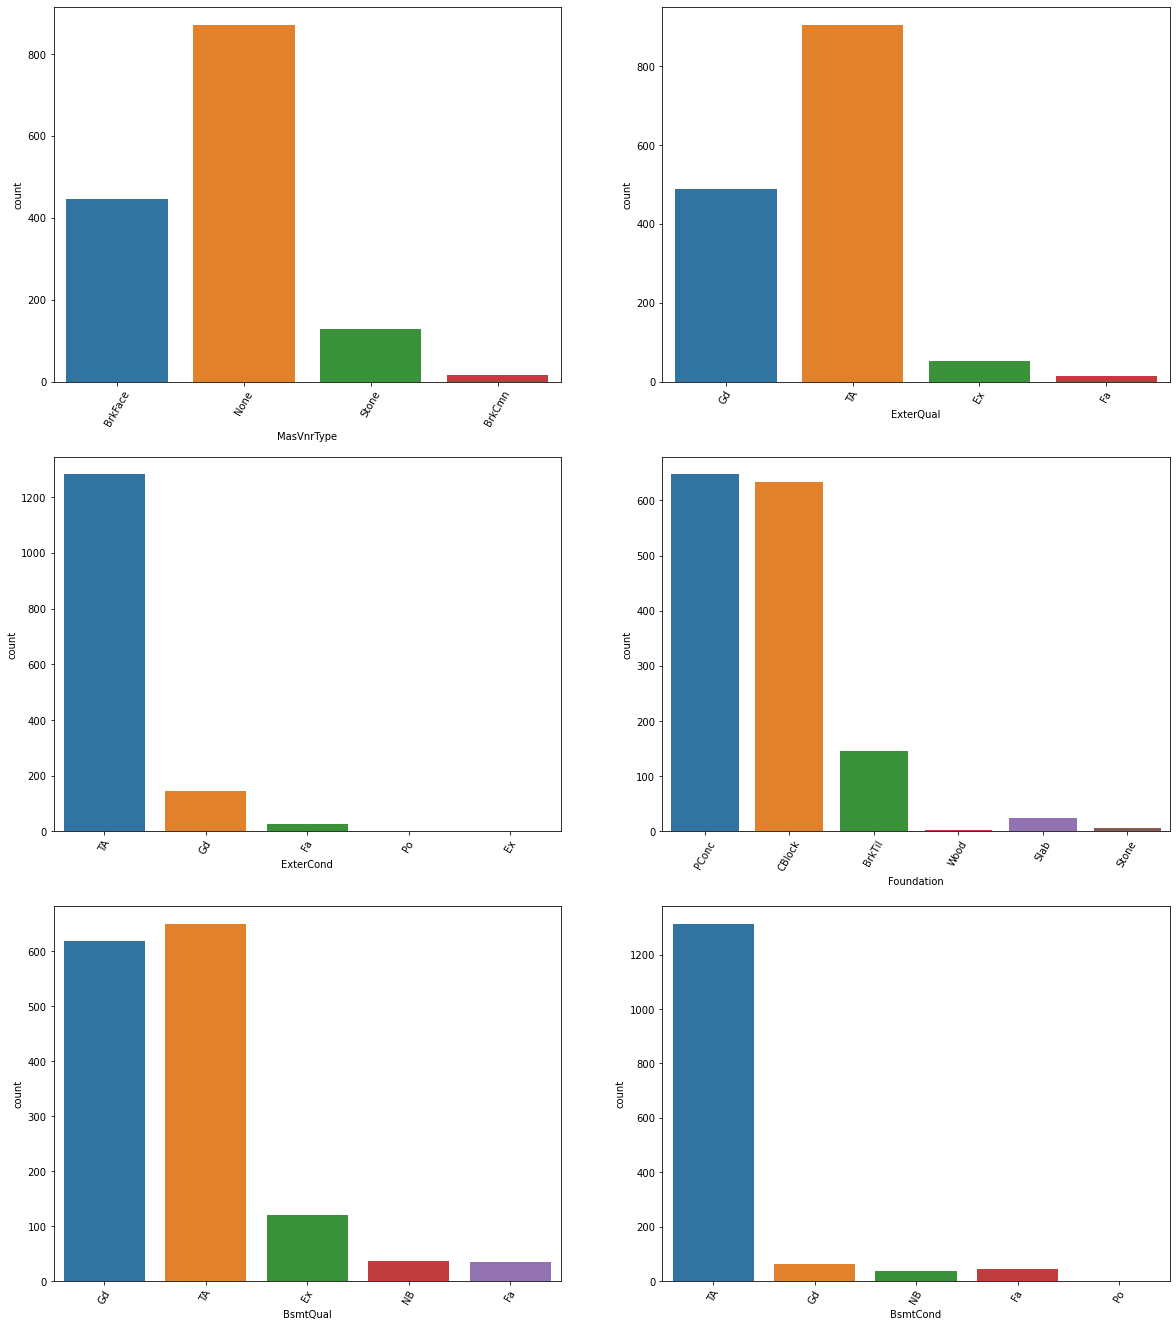

In [111]:
catList4=['MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond']
drawUnivariateCatPlot(catList4)

Its seems that many types of different columns have very less share , hence checking percentage of distribution for the columns values individually

##### 1. ExterQual

In [112]:
#Checking for percantage of distibution
train_df['ExterQual'].value_counts()*100/train_df.shape[0]

TA    62.054795
Gd    33.424658
Ex     3.561644
Fa     0.958904
Name: ExterQual, dtype: float64

As we can see, the remaining some types (which is less than 5 %) have very less collectively share, therefore merging them as Others.

In [113]:
train_df['ExterQual'] = train_df['ExterQual'].replace(['Ex','Fa'],'Others')

In [114]:
#Checking for percantage of distibution
train_df['ExterQual'].value_counts()*100/train_df.shape[0]

TA        62.054795
Gd        33.424658
Others     4.520548
Name: ExterQual, dtype: float64

##### 2. ExterCond

In [115]:
#Checking for percantage of distibution
train_df['ExterCond'].value_counts()*100/train_df.shape[0]

TA    87.808219
Gd    10.000000
Fa     1.917808
Ex     0.205479
Po     0.068493
Name: ExterCond, dtype: float64

As we can see, the remaining some types (which is less than 2 %) have very less collectively share, therefore merging them as Others

In [116]:
train_df['ExterCond'] = train_df['ExterCond'].replace(['Fa','Ex','Po'],'Others')

In [117]:
#Checking for percantage of distibution
train_df['ExterCond'].value_counts()*100/train_df.shape[0]

TA        87.808219
Gd        10.000000
Others     2.191781
Name: ExterCond, dtype: float64

##### 3. Foundation

In [118]:
#Checking for percantage of distibution
train_df['Foundation'].value_counts()*100/train_df.shape[0]

PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Slab       1.643836
Stone      0.410959
Wood       0.205479
Name: Foundation, dtype: float64

As we can see, the remaining some types (which is less than 2 %) have very less collectively share, therefore merging them as Others

In [119]:
train_df['Foundation'] = train_df['Foundation'].replace(['Slab','Stone','Wood'],'Others')

In [120]:
#Checking for percantage of distibution
train_df['Foundation'].value_counts()*100/train_df.shape[0]

PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Others     2.260274
Name: Foundation, dtype: float64

##### 4. BsmtQual

In [121]:
#Checking for percantage of distibution
train_df['BsmtQual'].value_counts()*100/train_df.shape[0]

TA    44.452055
Gd    42.328767
Ex     8.287671
NB     2.534247
Fa     2.397260
Name: BsmtQual, dtype: float64

As we can see, the remaining some types (which is less than 3 %) have very less collectively share, therefore merging them as Others

In [122]:
train_df['BsmtQual'] = train_df['BsmtQual'].replace(['NB','Fa'],'Others')

In [123]:
#Checking for percantage of distibution
train_df['BsmtQual'].value_counts()*100/train_df.shape[0]

TA        44.452055
Gd        42.328767
Ex         8.287671
Others     4.931507
Name: BsmtQual, dtype: float64

##### 5. BsmtCond

In [124]:
#Checking for percantage of distibution
train_df['BsmtCond'].value_counts()*100/train_df.shape[0]

TA    89.794521
Gd     4.452055
Fa     3.082192
NB     2.534247
Po     0.136986
Name: BsmtCond, dtype: float64

As we can see, the remaining some types (which is less than 4 %) have very less collectively share, therefore merging them as Others

In [125]:
train_df['BsmtCond'] = train_df['BsmtCond'].replace(['NB','Fa','Po'],'Others')

In [126]:
#Checking for percantage of distibution
train_df['BsmtCond'].value_counts()*100/train_df.shape[0]

TA        89.794521
Others     5.753425
Gd         4.452055
Name: BsmtCond, dtype: float64

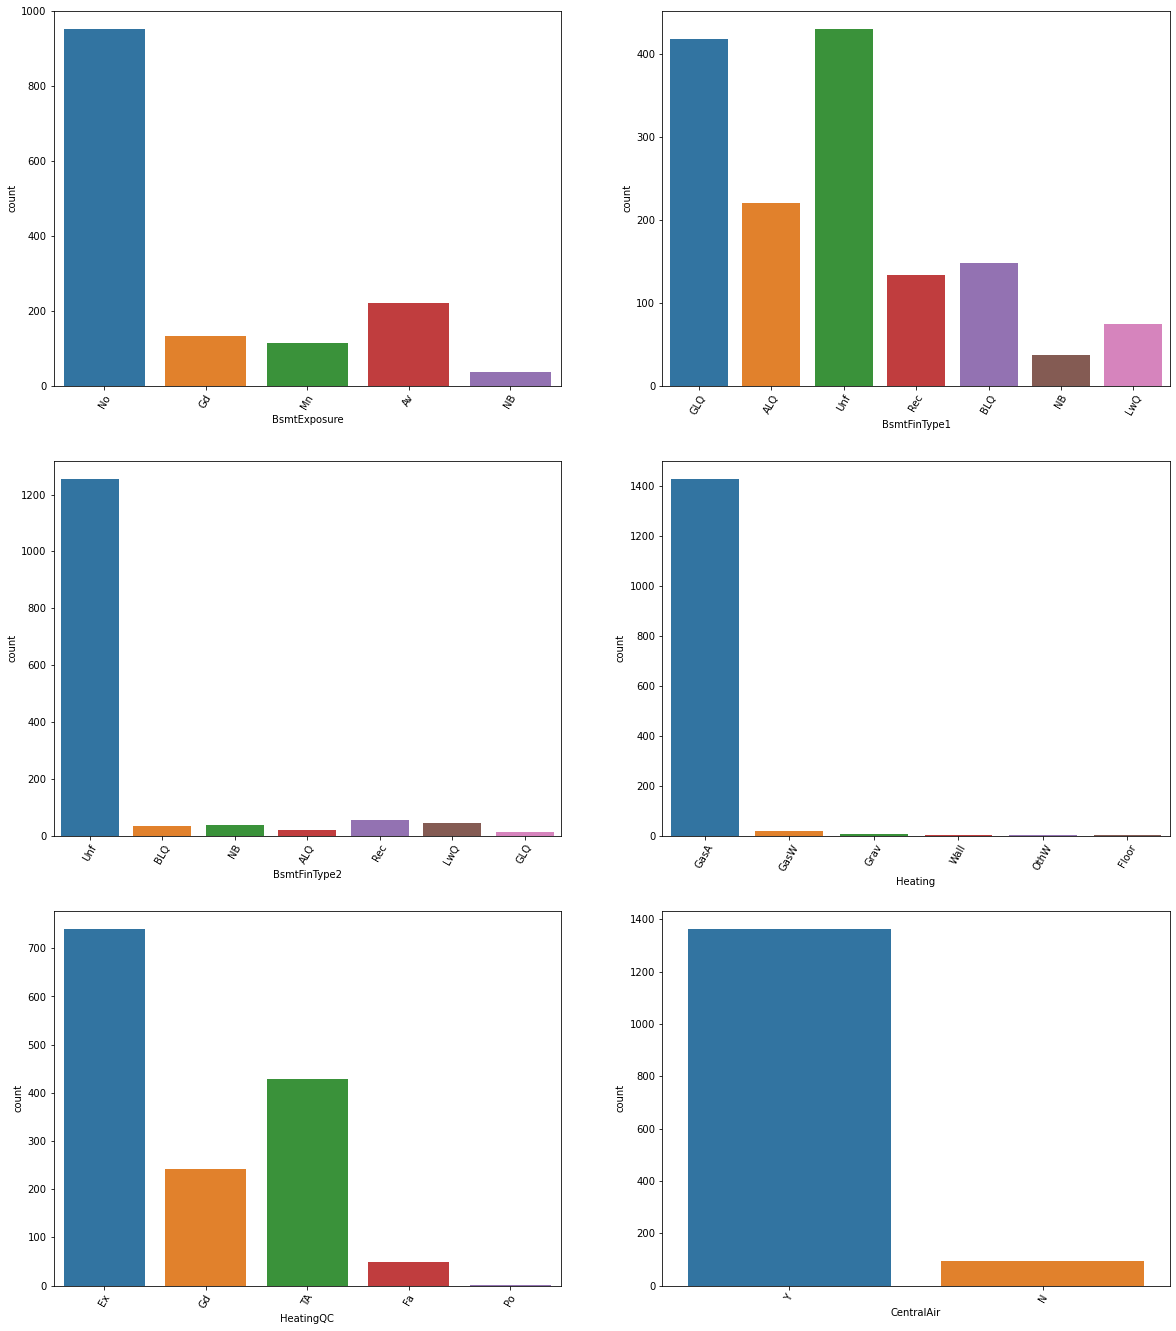

In [127]:
catList5=['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC','CentralAir']
drawUnivariateCatPlot(catList5)

Its seems that many types of different columns have very less share , hence checking percentage of distribution for the columns values individually

##### 1. BsmtFinType2

In [128]:
#Checking for percantage of distibution
train_df['BsmtFinType2'].value_counts()*100/train_df.shape[0]

Unf    86.027397
Rec     3.698630
LwQ     3.150685
NB      2.602740
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: BsmtFinType2, dtype: float64

As we can see, the remaining some types (which is less than 2.5 %) have very less collectively share, therefore merging them as Others

In [129]:
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].replace(['BLQ','ALQ','GLQ'],'Others')

In [130]:
#Checking for percantage of distibution
train_df['BsmtFinType2'].value_counts()*100/train_df.shape[0]

Unf       86.027397
Others     4.520548
Rec        3.698630
LwQ        3.150685
NB         2.602740
Name: BsmtFinType2, dtype: float64

##### 2. Heating

In [131]:
#Checking for percantage of distibution
train_df['Heating'].value_counts()*100/train_df.shape[0]

GasA     97.808219
GasW      1.232877
Grav      0.479452
Wall      0.273973
OthW      0.136986
Floor     0.068493
Name: Heating, dtype: float64

As we can see, the column - Heating, is highly skewed i.e. column GasA, more than 96% , therefore have not much significance on the model. Therefore dropping the column

In [132]:
# dropping the column from the data
train_df.drop(labels='Heating',axis=1,inplace=True)

##### 3. HeatingQC

In [133]:
#Checking for percantage of distibution
train_df['HeatingQC'].value_counts()*100/train_df.shape[0]

Ex    50.753425
TA    29.315068
Gd    16.506849
Fa     3.356164
Po     0.068493
Name: HeatingQC, dtype: float64

As we can see, the remaining some types (which is less than 4 %) have very less collectively share, therefore merging them as Others

In [134]:
train_df['HeatingQC'] = train_df['HeatingQC'].replace(['Po','Fa'],'Others')

In [135]:
#Checking for percantage of distibution
train_df['HeatingQC'].value_counts()*100/train_df.shape[0]

Ex        50.753425
TA        29.315068
Gd        16.506849
Others     3.424658
Name: HeatingQC, dtype: float64

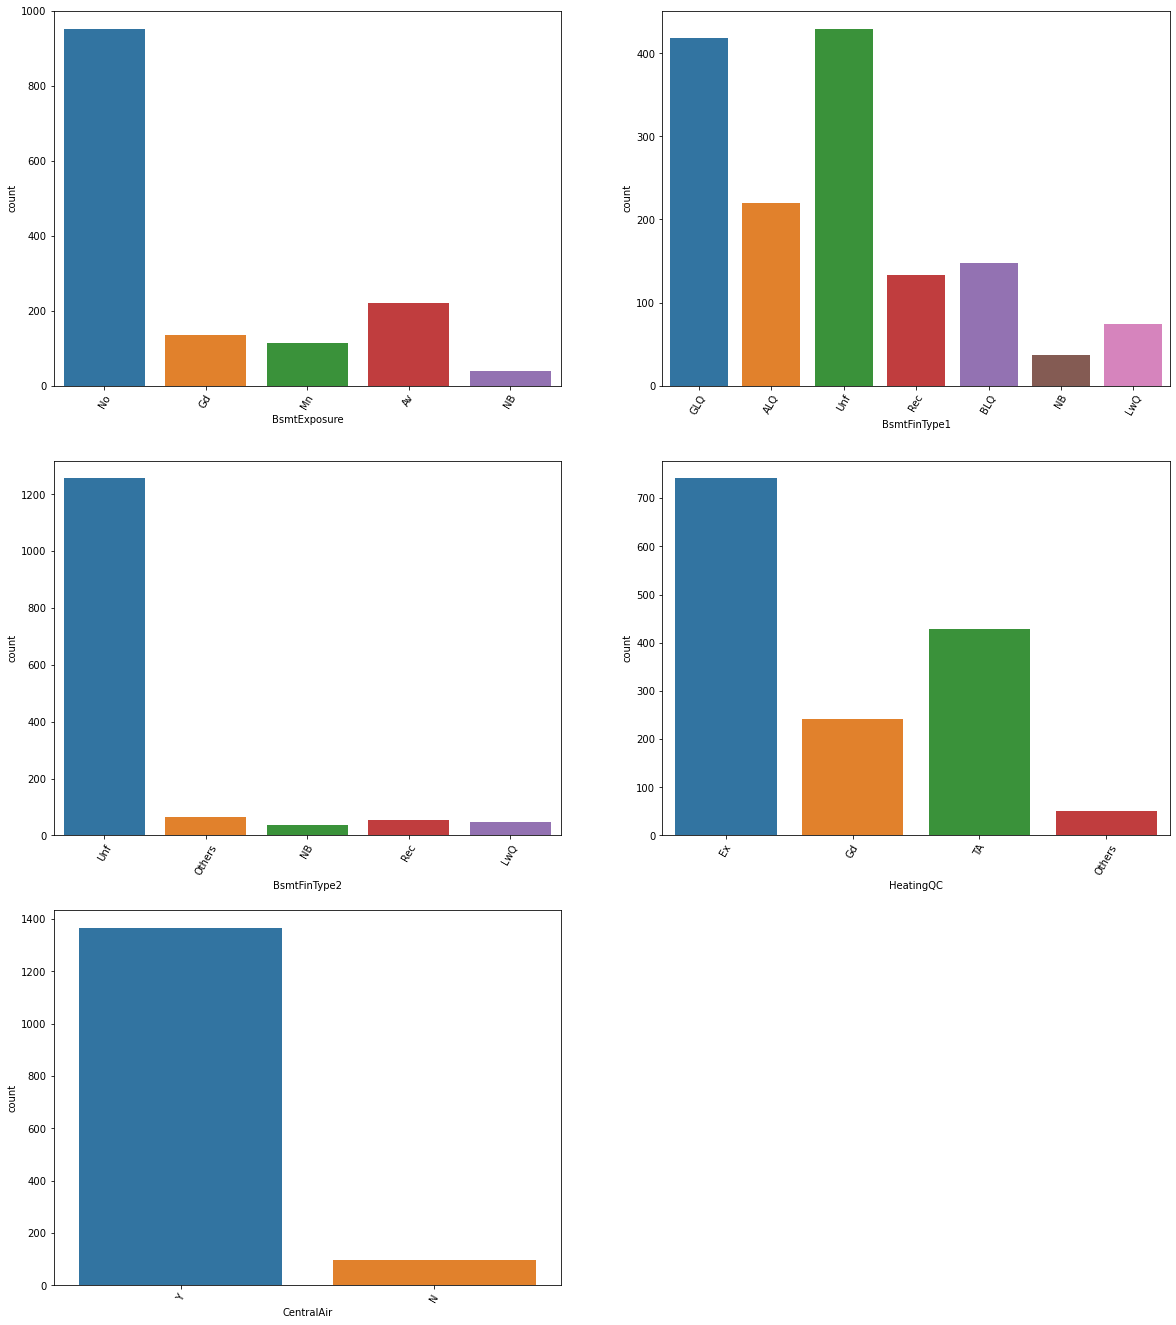

In [136]:
catList5=['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC','CentralAir']
drawUnivariateCatPlot(catList5)

- Observations
1. Many Property have no exposure for walkout or garden level walls.
2. More than half of property have excellent heating quality.

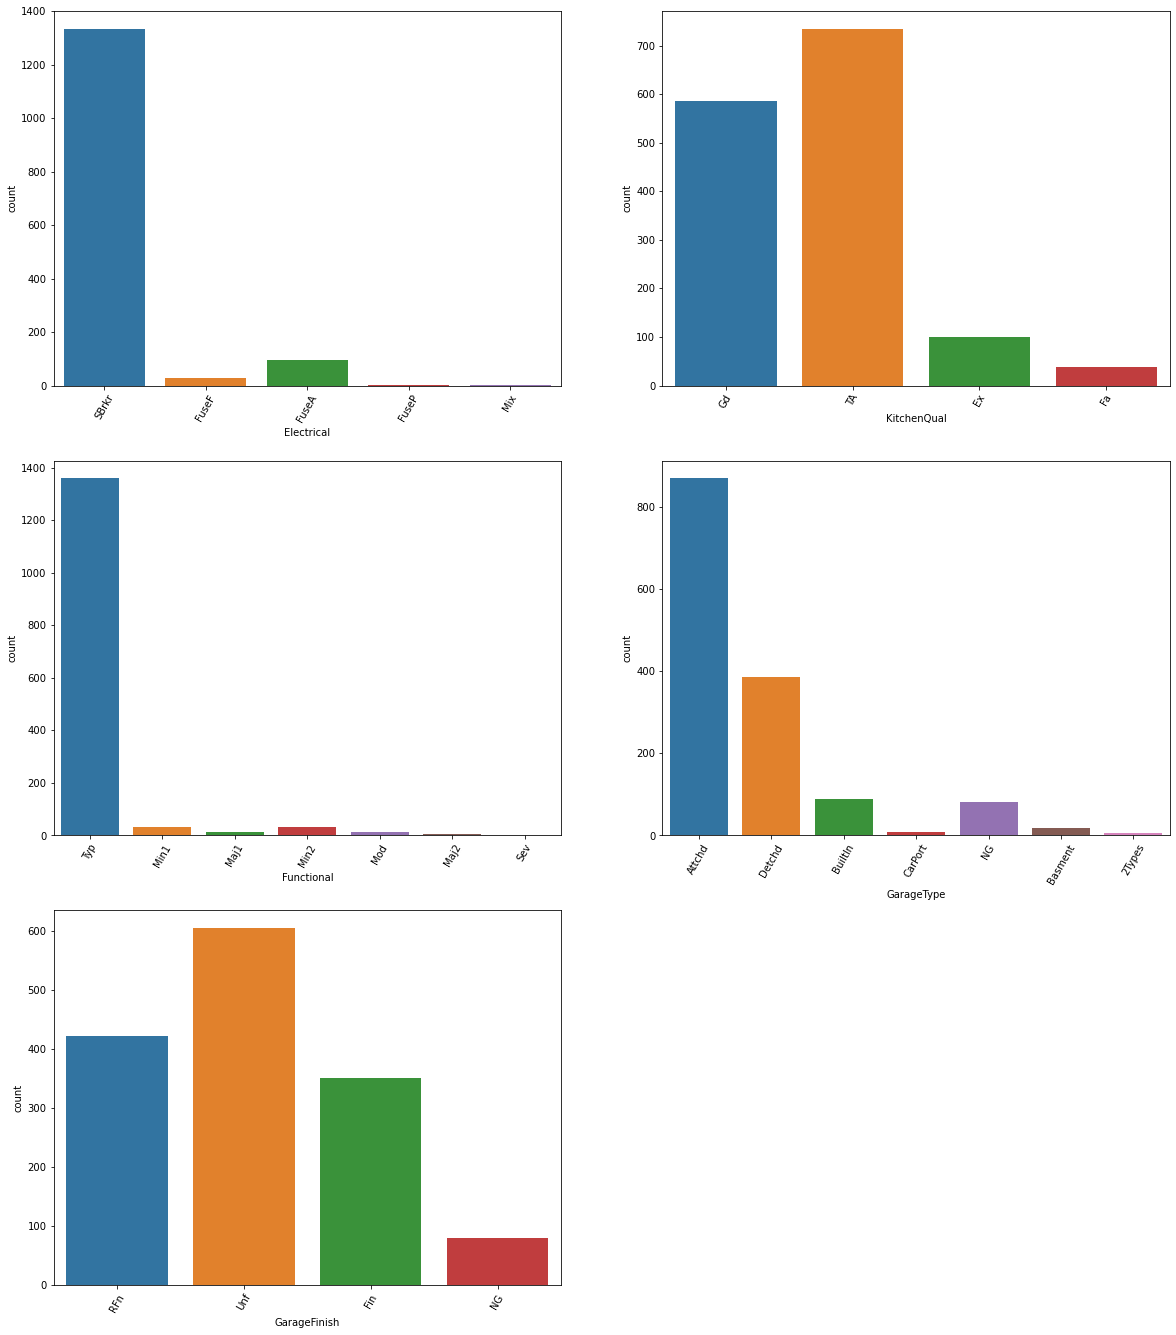

In [137]:
catList6=['Electrical', 'KitchenQual', 'Functional','GarageType', 'GarageFinish']
drawUnivariateCatPlot(catList6)

Its seems that many types of different columns have very less share , hence checking percentage of distribution for the columns values individually

##### 1. Electrical

In [138]:
#Checking for percantage of distibution
train_df['Electrical'].value_counts()*100/train_df.shape[0]

SBrkr    91.438356
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: Electrical, dtype: float64

As we can see, the remaining some types (which is less than 2 %) have very less collectively share, therefore merging them as Others

In [139]:
train_df['Electrical'] = train_df['Electrical'].replace(['FuseF','FuseP','Mix'],'Others')

In [140]:
#Checking for percantage of distibution
train_df['Electrical'].value_counts()*100/train_df.shape[0]

SBrkr     91.438356
FuseA      6.438356
Others     2.123288
Name: Electrical, dtype: float64

##### 2. Functional

In [141]:
#Checking for percantage of distibution
train_df['Functional'].value_counts()*100/train_df.shape[0]

Typ     93.150685
Min2     2.328767
Min1     2.123288
Mod      1.027397
Maj1     0.958904
Maj2     0.342466
Sev      0.068493
Name: Functional, dtype: float64

As we can see, the remaining some types (which is less than 1 %) have very less collectively share, therefore merging them as Others

In [142]:
train_df['Functional'] = train_df['Functional'].replace(['Mod','Maj1','Maj2','Sev'],'Others')

In [143]:
#Checking for percantage of distibution
train_df['Functional'].value_counts()*100/train_df.shape[0]

Typ       93.150685
Others     2.397260
Min2       2.328767
Min1       2.123288
Name: Functional, dtype: float64

##### 3. GarageType

In [144]:
#Checking for percantage of distibution
train_df['GarageType'].value_counts()*100/train_df.shape[0]

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
NG          5.547945
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

As we can see, the remaining some types (which is less than 2 %) have very less collectively share, therefore merging them as Others

In [145]:
train_df['GarageType'] = train_df['GarageType'].replace(['Basment','CarPort','2Types'],'Others')

In [146]:
#Checking for percantage of distibution
train_df['GarageType'].value_counts()*100/train_df.shape[0]

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
NG          5.547945
Others      2.328767
Name: GarageType, dtype: float64

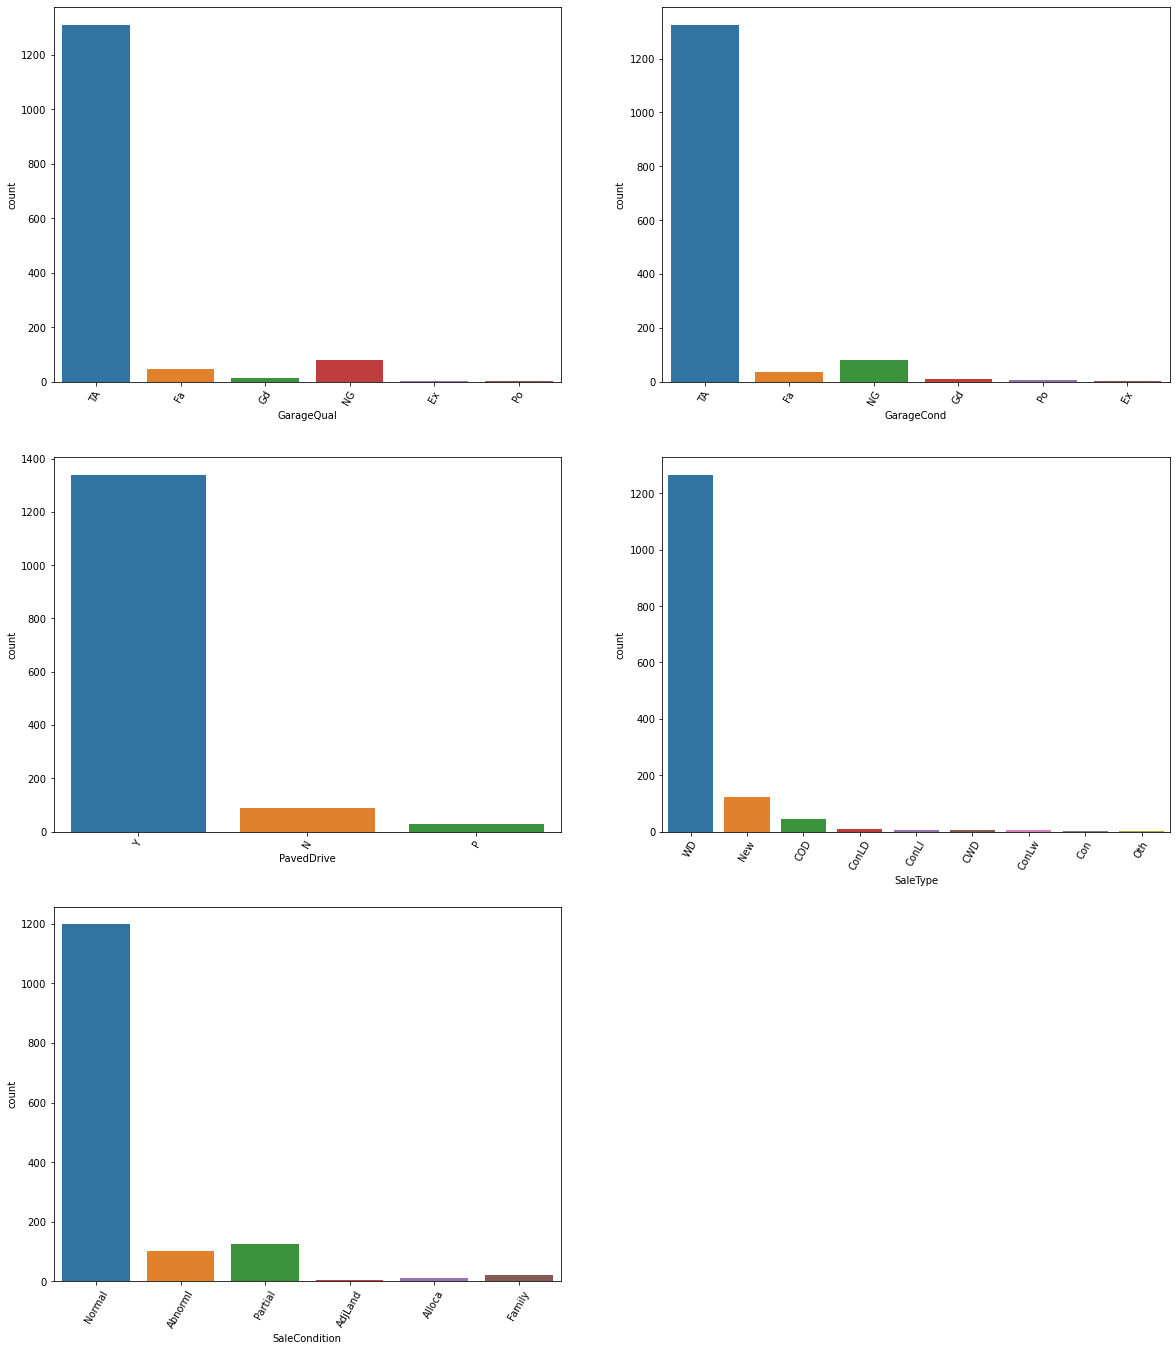

In [147]:
catList7=['GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
drawUnivariateCatPlot(catList7)

Its seems that many types of different columns have very less share , hence checking percentage of distribution for the columns values individually

##### 1. GarageQual

In [148]:
#Checking for percantage of distibution
train_df['GarageQual'].value_counts()*100/train_df.shape[0]

TA    89.794521
NG     5.547945
Fa     3.287671
Gd     0.958904
Po     0.205479
Ex     0.205479
Name: GarageQual, dtype: float64

As we can see, the remaining some types (which is less than 3 %) have very less collectively share, therefore merging them as Others

In [149]:
train_df['GarageQual'] = train_df['GarageQual'].replace(['Fa','Gd','Po','Ex'],'Others')

In [150]:
#Checking for percantage of distibution
train_df['GarageQual'].value_counts()*100/train_df.shape[0]

TA        89.794521
NG         5.547945
Others     4.657534
Name: GarageQual, dtype: float64

##### 2. GarageCond

In [151]:
#Checking for percantage of distibution
train_df['GarageCond'].value_counts()*100/train_df.shape[0]

TA    90.821918
NG     5.547945
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: GarageCond, dtype: float64

As we can see, the remaining some types (which is less than 3 %) have very less collectively share, therefore merging them as Others

In [152]:
train_df['GarageCond'] = train_df['GarageCond'].replace(['Gd','Fa','Po','Ex'],'Others')

In [153]:
#Checking for percantage of distibution
train_df['GarageCond'].value_counts()*100/train_df.shape[0]

TA        90.821918
NG         5.547945
Others     3.630137
Name: GarageCond, dtype: float64

##### 3. SaleType

In [154]:
#Checking for percantage of distibution
train_df['SaleType'].value_counts()*100/train_df.shape[0]

WD       86.780822
New       8.356164
COD       2.945205
ConLD     0.616438
ConLw     0.342466
ConLI     0.342466
CWD       0.273973
Oth       0.205479
Con       0.136986
Name: SaleType, dtype: float64

As we can see, the remaining some types (which is less than 3 %) have very less collectively share, therefore merging them as Others

In [155]:
train_df['SaleType'] = train_df['SaleType'].replace(['COD','ConLI','ConLD','ConLw','CWD','Oth','Con'],'Others')

In [156]:
#Checking for percantage of distibution
train_df['SaleType'].value_counts()*100/train_df.shape[0]

WD        86.780822
New        8.356164
Others     4.863014
Name: SaleType, dtype: float64

##### 4. SaleCondition

In [157]:
#Checking for percantage of distibution
train_df['SaleCondition'].value_counts()*100/train_df.shape[0]

Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Family      1.369863
Alloca      0.821918
AdjLand     0.273973
Name: SaleCondition, dtype: float64

As we can see, the remaining some types (which is less than 2 %) have very less collectively share, therefore merging them as Others

In [158]:
train_df['SaleCondition'] = train_df['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

In [159]:
#Checking for percantage of distibution
train_df['SaleCondition'].value_counts()*100/train_df.shape[0]

Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Others      2.465753
Name: SaleCondition, dtype: float64

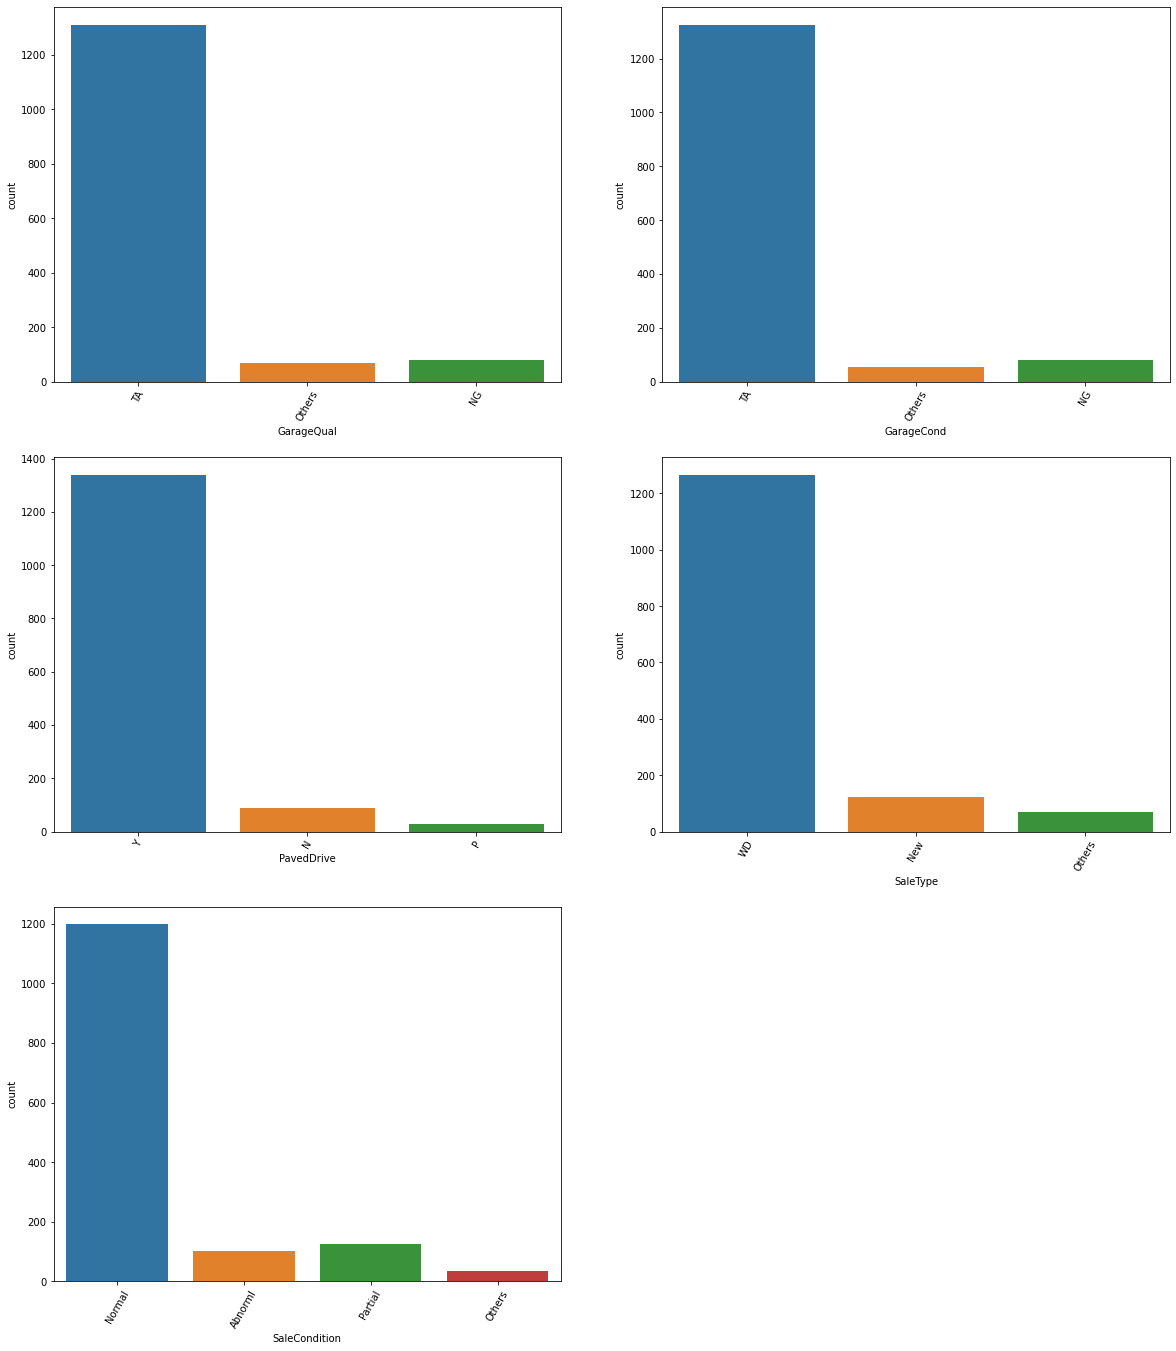

In [160]:
drawUnivariateCatPlot(catList7)

- Observation 
1. Many condition of property sale is normal.
2. Most of the garage qaulity for the property are average. 

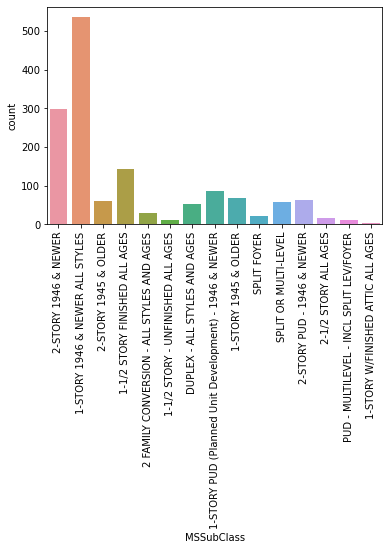

In [161]:
sns.countplot(train_df['MSSubClass'])
plt.xticks(rotation=90)
plt.show()

In [162]:
#Checking for percantage of distibution
train_df['MSSubClass'].value_counts()*100/train_df.shape[0]

1-STORY 1946 & NEWER ALL STYLES                          36.712329
2-STORY 1946 & NEWER                                     20.479452
1-1/2 STORY FINISHED ALL AGES                             9.863014
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     5.958904
1-STORY 1945 & OLDER                                      4.726027
2-STORY PUD - 1946 & NEWER                                4.315068
2-STORY 1945 & OLDER                                      4.109589
SPLIT OR MULTI-LEVEL                                      3.972603
DUPLEX - ALL STYLES AND AGES                              3.561644
2 FAMILY CONVERSION - ALL STYLES AND AGES                 2.054795
SPLIT FOYER                                               1.369863
2-1/2 STORY ALL AGES                                      1.095890
1-1/2 STORY - UNFINISHED ALL AGES                         0.821918
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   0.684932
1-STORY W/FINISHED ATTIC ALL AGES                         0.27

As we can see, the remaining some types (which is less than 1 %) have very less collectively share, therefore merging them as Others

In [163]:
train_df['MSSubClass'] = train_df['MSSubClass'].replace(['1-1/2 STORY - UNFINISHED ALL AGES','PUD - MULTILEVEL - INCL SPLIT LEV/FOYER','1-STORY W/FINISHED ATTIC ALL AGES'],'Others')

In [164]:
#Checking for percantage of distibution
train_df['MSSubClass'].value_counts()*100/train_df.shape[0]

1-STORY 1946 & NEWER ALL STYLES                          36.712329
2-STORY 1946 & NEWER                                     20.479452
1-1/2 STORY FINISHED ALL AGES                             9.863014
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     5.958904
1-STORY 1945 & OLDER                                      4.726027
2-STORY PUD - 1946 & NEWER                                4.315068
2-STORY 1945 & OLDER                                      4.109589
SPLIT OR MULTI-LEVEL                                      3.972603
DUPLEX - ALL STYLES AND AGES                              3.561644
2 FAMILY CONVERSION - ALL STYLES AND AGES                 2.054795
Others                                                    1.780822
SPLIT FOYER                                               1.369863
2-1/2 STORY ALL AGES                                      1.095890
Name: MSSubClass, dtype: float64

##### Numerical Variables

In [165]:
Num_df = train_df.select_dtypes(include=['int64','float64'])
Num_df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'YearBuilt_Age', 'YearRemodAdd_Age',
       'YrSold_Age', 'GarageYrBlt_Age'],
      dtype='object')

Text(0.5, 1.0, 'MasVnrArea')

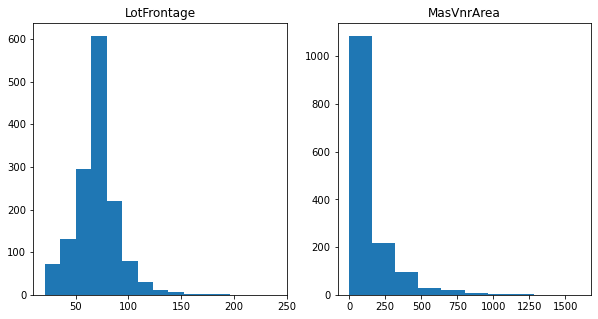

In [166]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.hist(train_df['LotFrontage'], bins = 20)
plt.title('LotFrontage')
plt.xlim(10,250)

plt.subplot(122)
plt.hist(train_df['MasVnrArea'], bins = 10)
plt.title('MasVnrArea')

- Observations
1. Maximum area of street connected to property lies b/w 50 and 100.

#### 3.2 Bivariate Analysis
#### Categorical Variables

In [167]:
# bivariabte analysis for categorical variable
def drawBivariateCatPlot(catList):
    plt.figure(figsize = (20,40))
    for i in catList:
        plt.subplot(5,2,catList.index(i)+1)
        sns.boxplot(data=train_df,x=i,y='SalePrice')
        plt.xticks(rotation=90)
    plt.show()


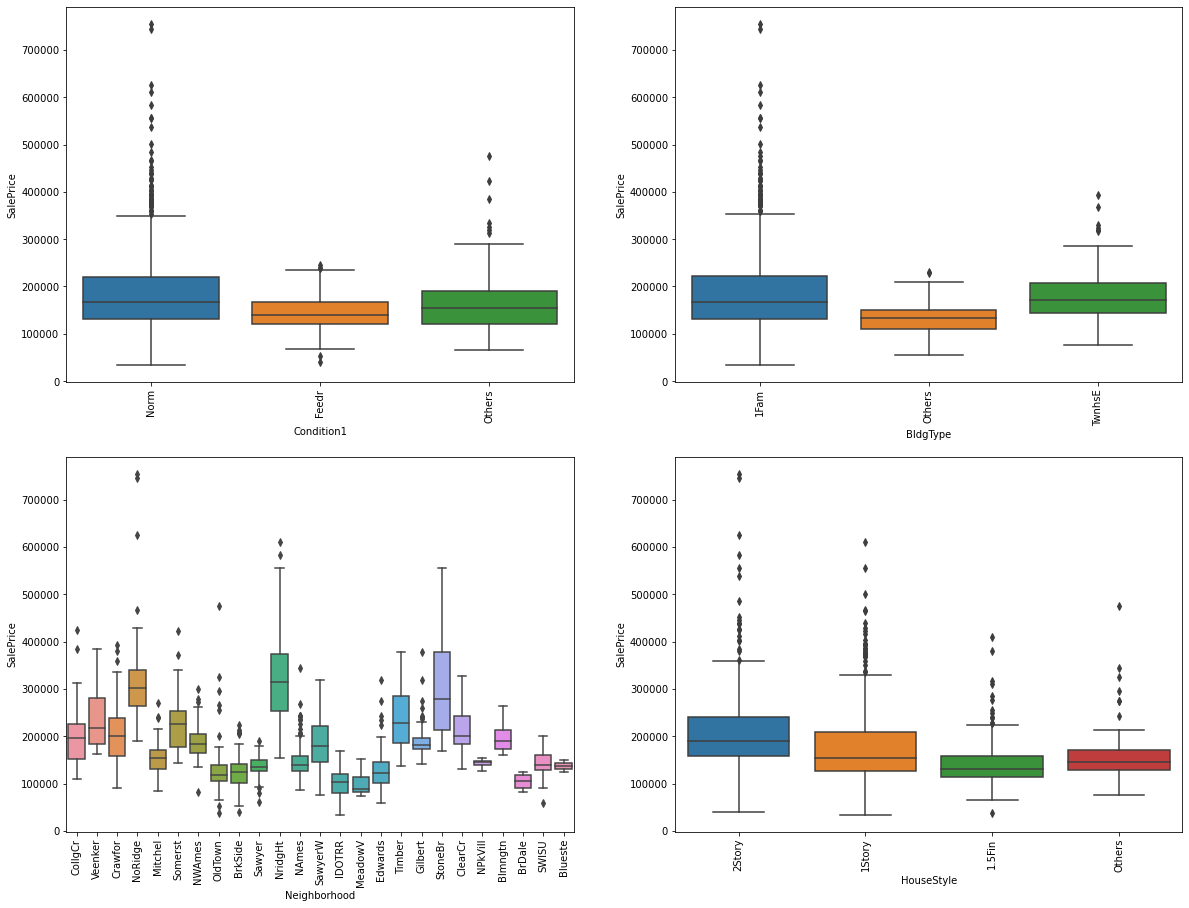

In [168]:
drawBivariateCatPlot(catList2)

- Observations
1. The property which having neighborhood Stone Brook, Northridge Heights and Northridge are averagely high in rate.
2. 2 story housing style have more greator sale price as compared to other housing style

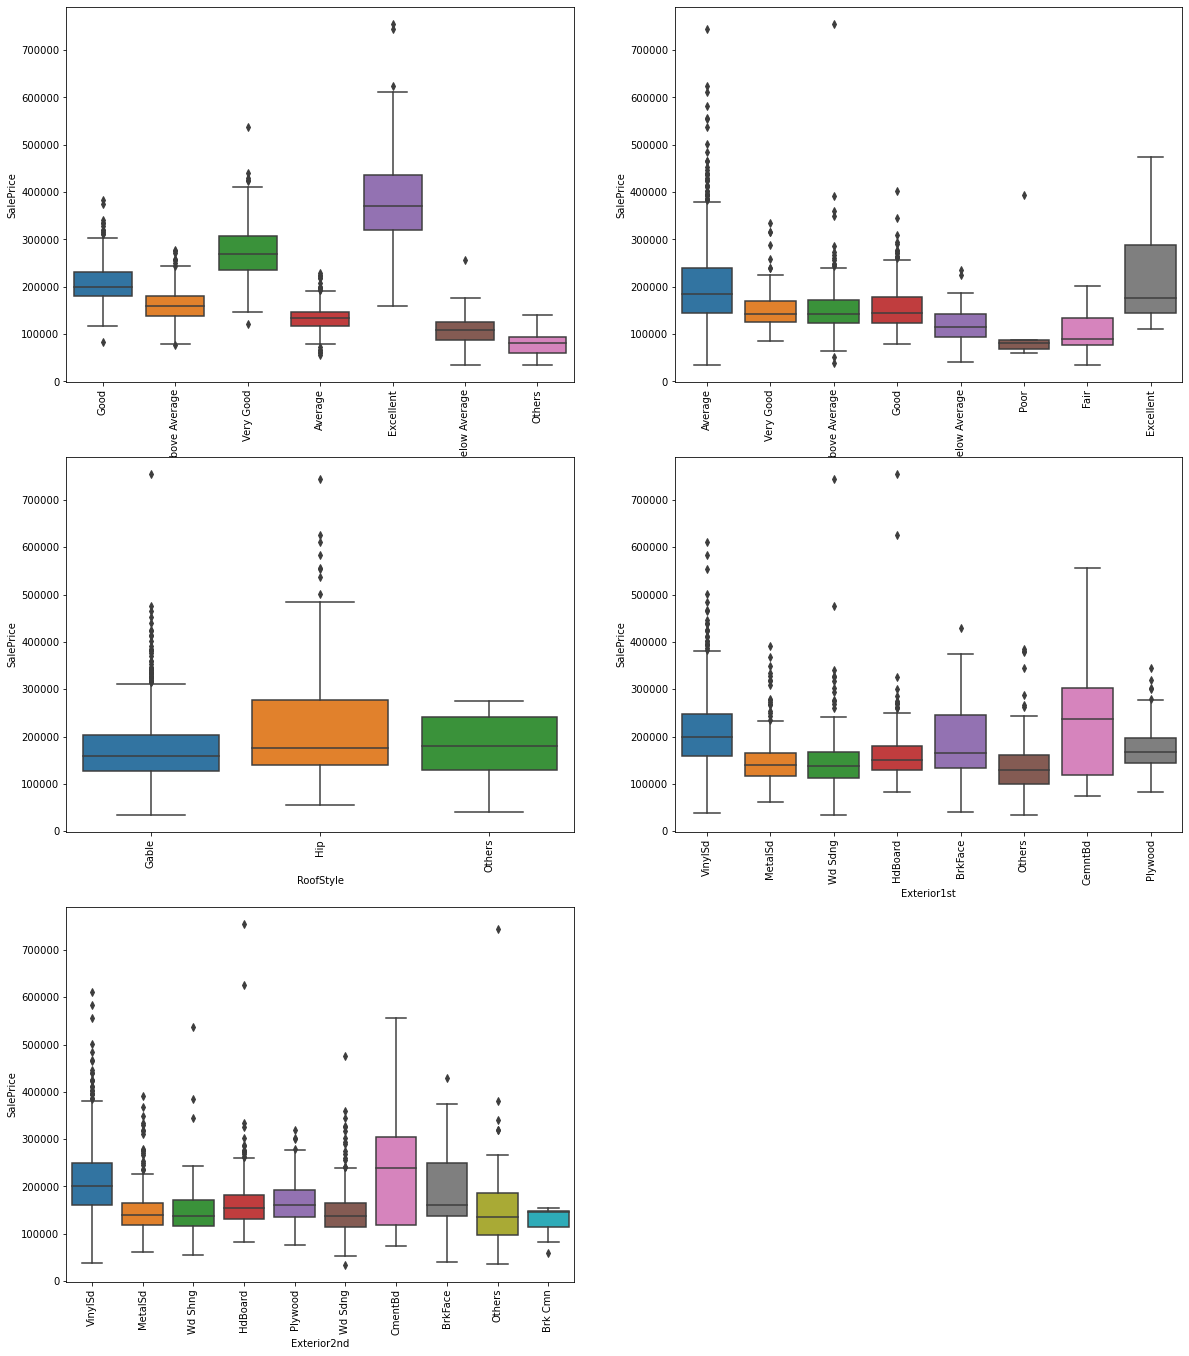

In [169]:
drawBivariateCatPlot(catList3)

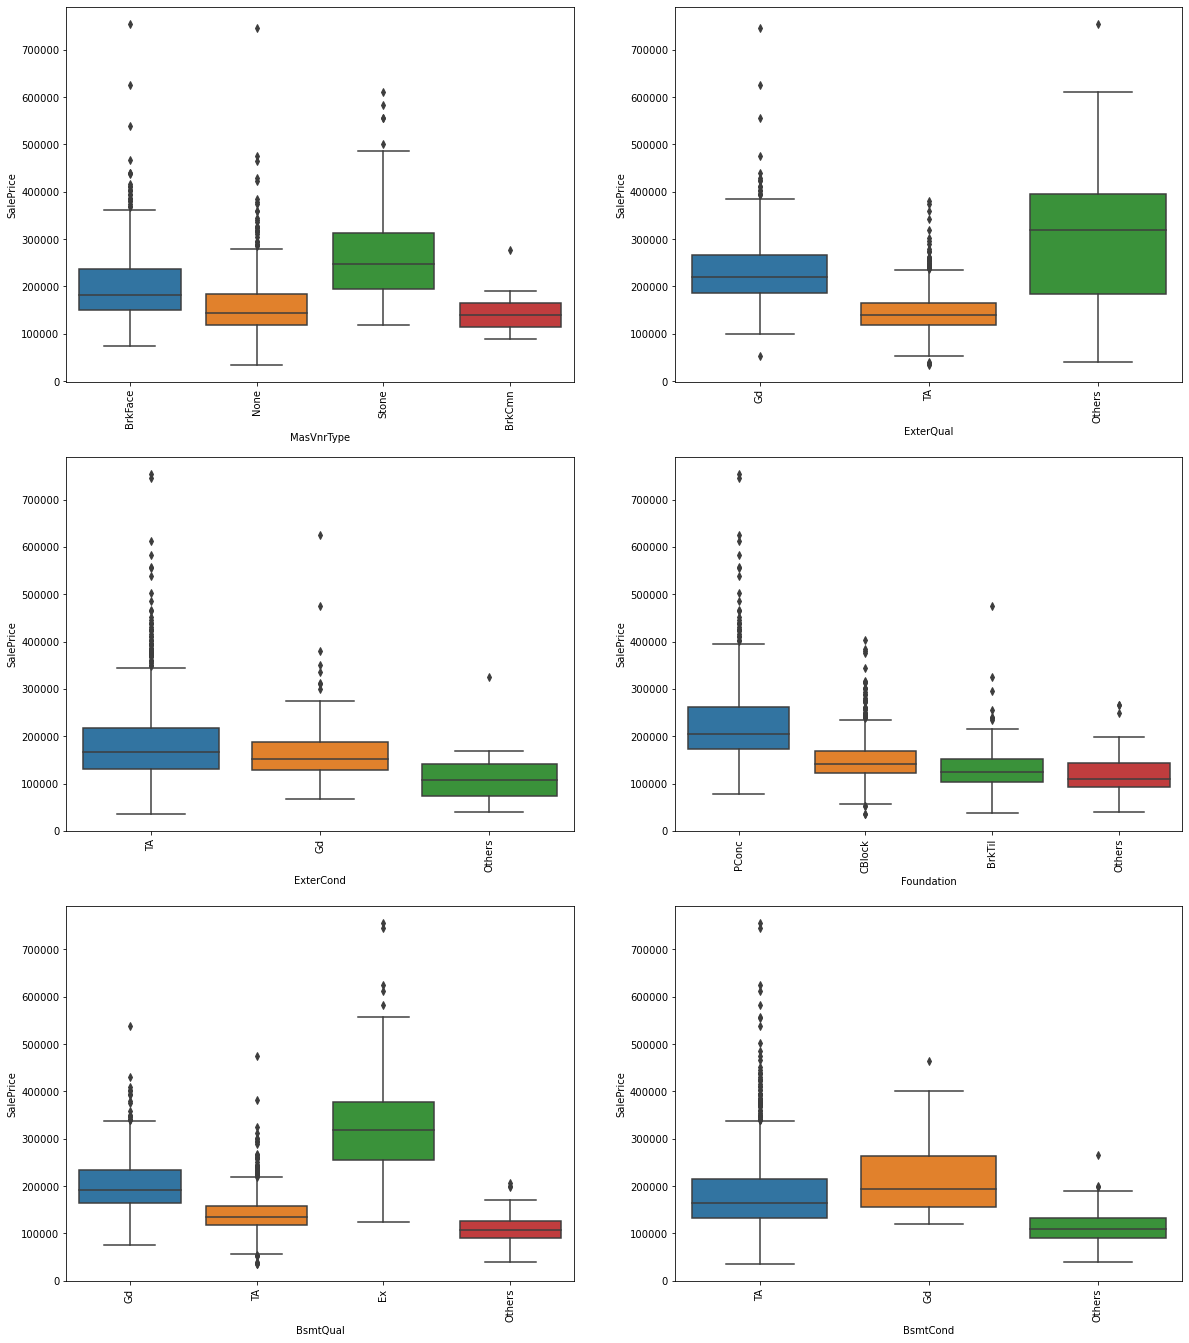

In [170]:
drawBivariateCatPlot(catList4)

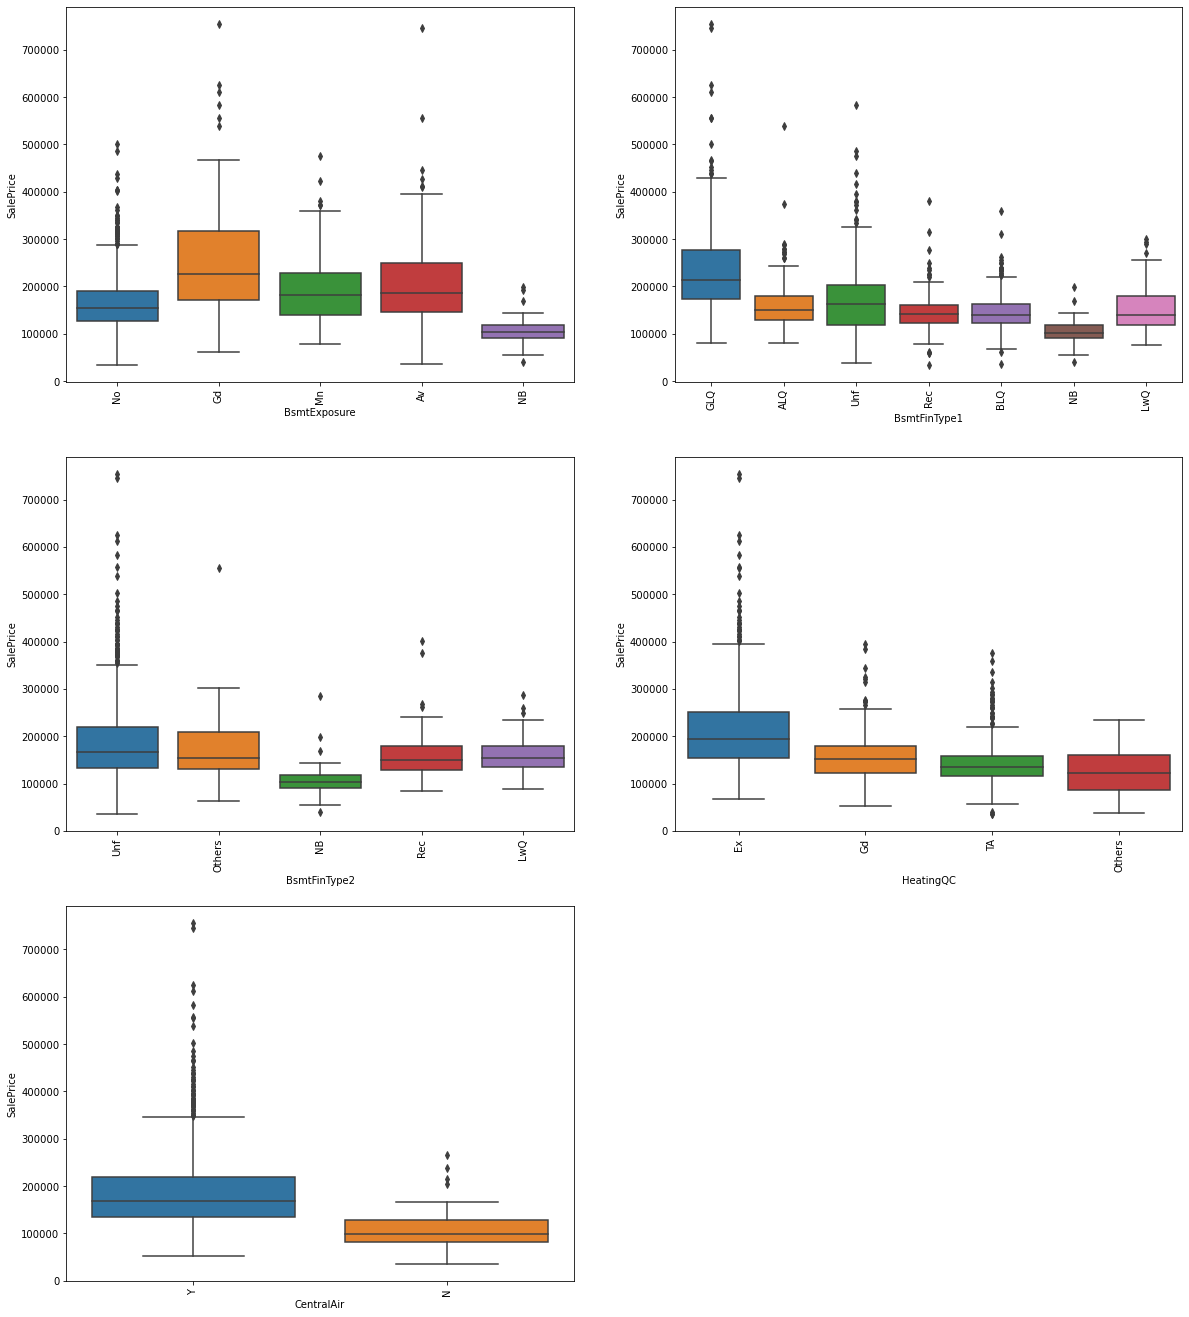

In [171]:
drawBivariateCatPlot(catList5)

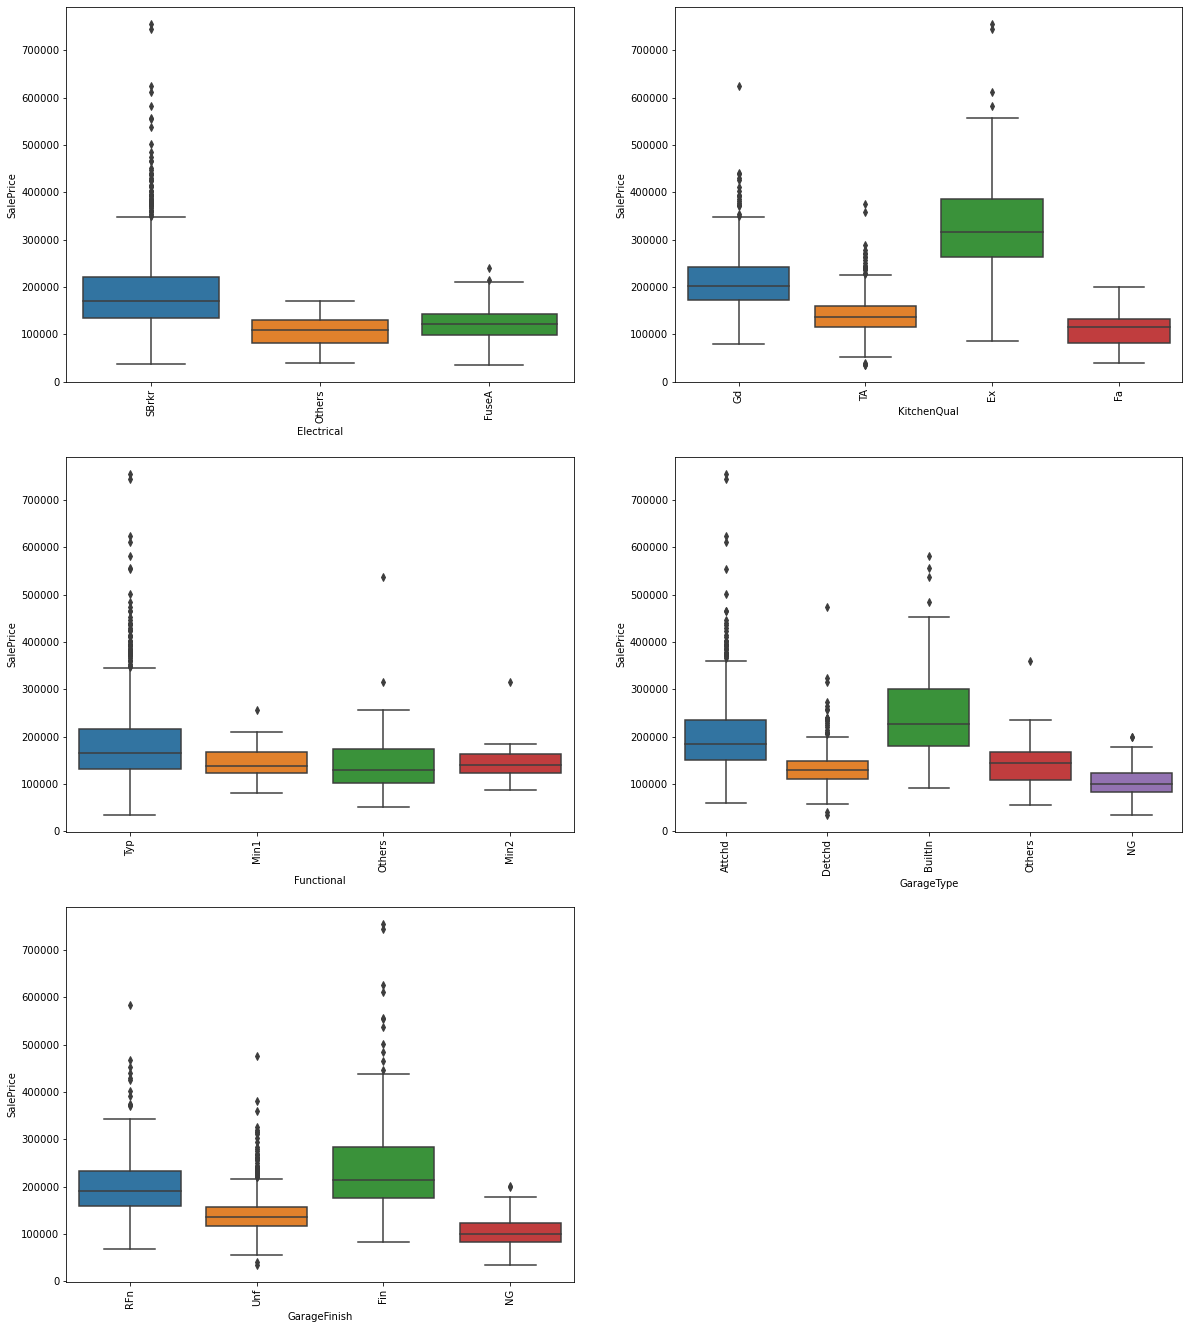

In [172]:
drawBivariateCatPlot(catList6)

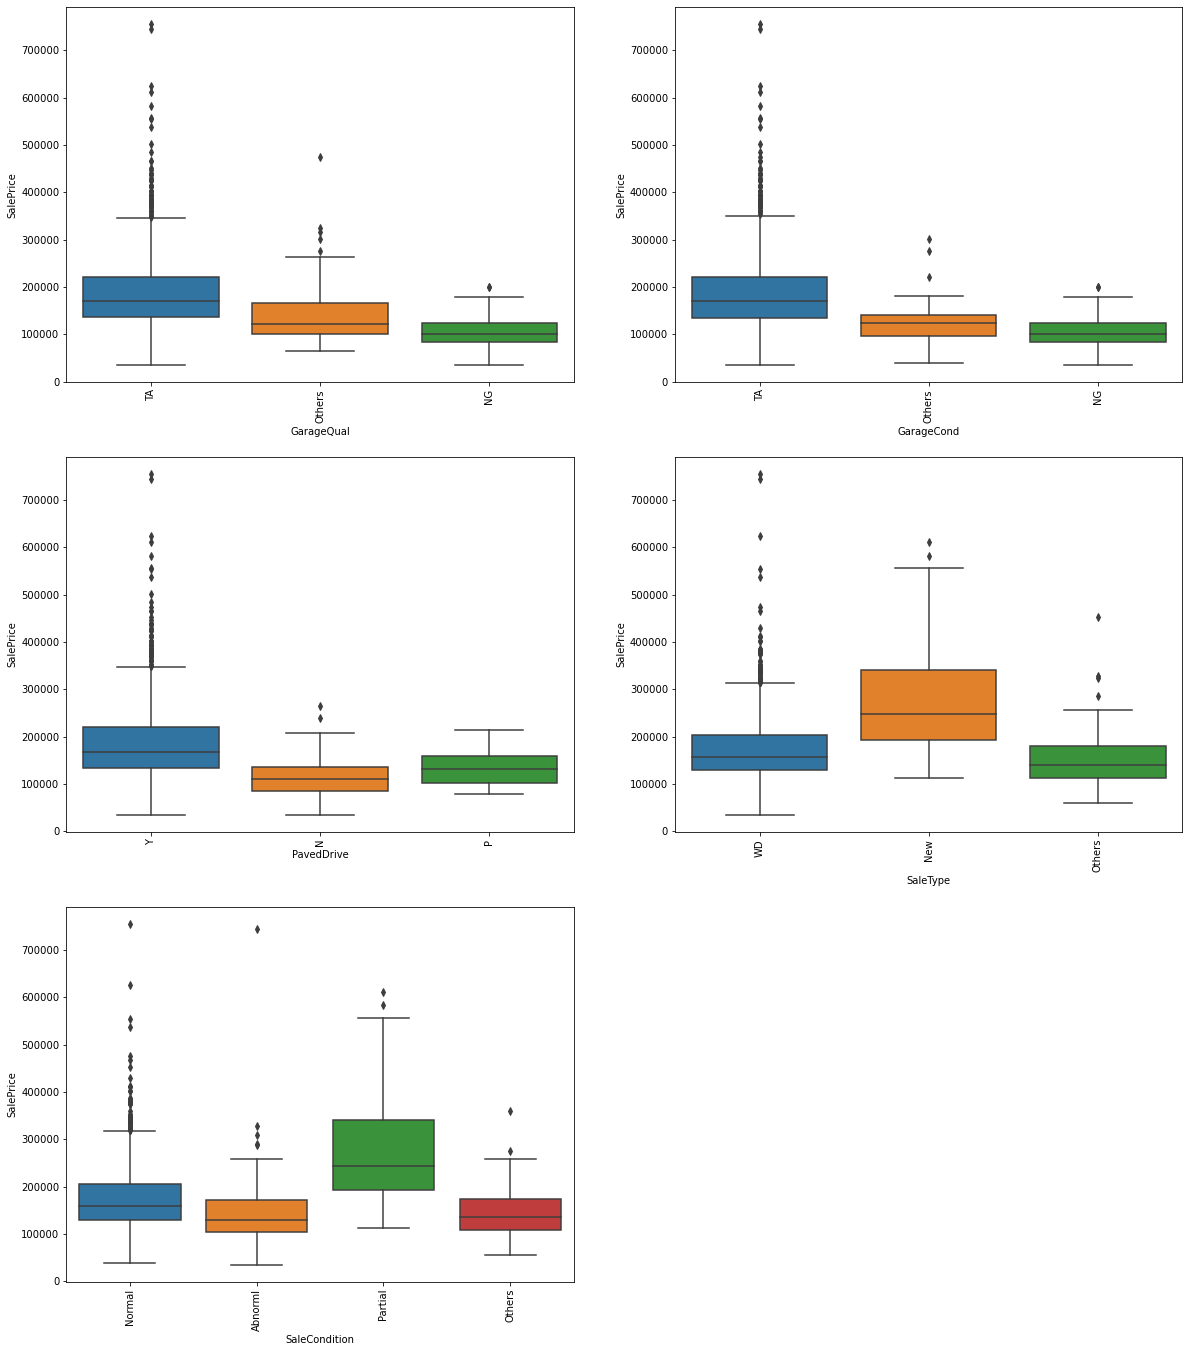

In [173]:
drawBivariateCatPlot(catList7)

- Observation
1. Rate of property is very high which has excellent quality of kitchen, garage, basement , heating , inshort overall quality , which is pretty obvious.
2. The newly house constructed are averagely high in price.
3. The rate of sale price is high for the partially completed house, as they are associated with new Home.

##### Numerical Analysis

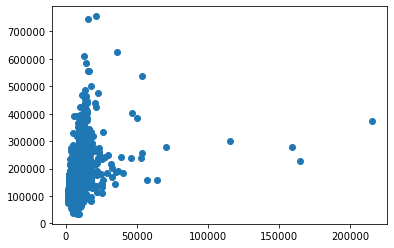

In [174]:
plt.scatter(data=train_df,x='LotArea',y='SalePrice')

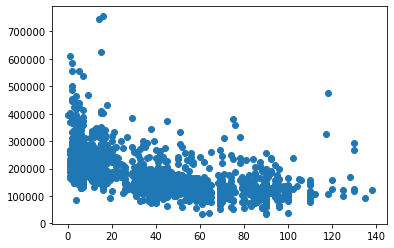

In [175]:
plt.scatter(data=train_df,x='YearBuilt_Age',y='SalePrice')

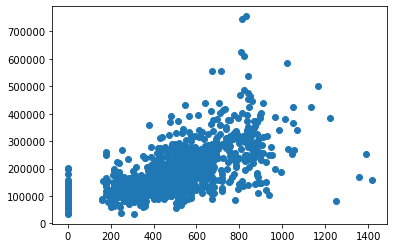

In [176]:
plt.scatter(data=train_df,x='GarageArea',y='SalePrice')

- Observation
1. Price of property is high which is recently built.
2. Price of property doesn't increase with lot size area.
3. Garage Area for most of the property are b/w 200 to 800.

##### Heatmap

In [177]:
# correlation matrix
cor = Num_df.corr()
cor

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
Id,1.000000,-0.009921,-0.033226,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,-0.021917,0.012713,0.021998,-0.000712,0.000122
LotFrontage,-0.009921,1.000000,0.304522,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.334771,-0.116685,-0.083348,-0.006380,-0.062996
LotArea,-0.033226,0.304522,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843,-0.014228,-0.013788,0.014261,0.025865
MasVnrArea,-0.051071,0.178469,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,0.472614,-0.311600,-0.176529,0.008317,-0.244444
BsmtFinSF1,-0.005024,0.214367,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.386420,-0.249503,-0.128451,-0.014359,-0.148782
BsmtFinSF2,-0.005968,0.042463,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.011378,0.049107,0.067759,-0.031706,0.087684
BsmtUnfSF,-0.007940,0.124098,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,0.214479,-0.149040,-0.181133,0.041258,-0.185610
TotalBsmtSF,-0.015415,0.363472,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,0.613581,-0.391452,-0.291066,0.014969,-0.309386
1stFlrSF,0.010496,0.413773,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,0.605852,-0.281986,-0.240379,0.013604,-0.224897
2ndFlrSF,0.005590,0.072388,0.050986,0.173800,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561,0.183926,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.035164,0.319334,-0.010308,-0.140024,0.028700,-0.068441


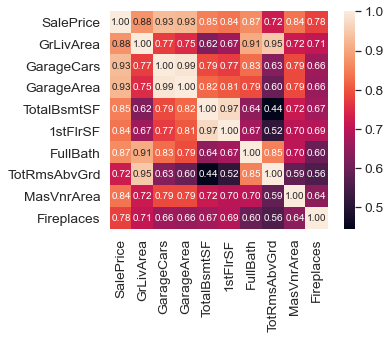

In [178]:
#saleprice correlation matrix
cols = cor.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(cor[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Step 4. Data Preparation

In [179]:
Cat_df = train_df.select_dtypes(include=['object'])
catColumns=Cat_df.columns
dummyVarible=pd.get_dummies(train_df[catColumns],drop_first=True) #Drop the first column from status df using 'drop_first = True'
dummyVarible.head()

,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_Others,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LandContour_Others,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_Others,BldgType_Others,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,...,Foundation_PConc,BsmtQual_Gd,BsmtQual_Others,BsmtQual_TA,BsmtCond_Others,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NB,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NB,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_NB,BsmtFinType2_Others,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,CentralAir_Y,Electrical_Others,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Others,Functional_Typ,GarageType_BuiltIn,GarageType_Detchd,GarageType_NG,GarageType_Others,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Others,GarageQual_TA,GarageCond_Others,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0


In [180]:
dummyVarible.shape

(1460, 141)

Now there are new 141 columns 

In [181]:
# Add the results to the original sales dataframe
train_df = pd.concat([train_df,dummyVarible], axis = 1)

In [182]:
# Drop columns for which we have created the dummies
train_df.drop(catColumns, axis = 1, inplace = True)

In [183]:
train_df.shape

(1460, 176)

Now there are 176 columns in the dataset

In [184]:
#Dropping other column
train_df.drop(['Id'], axis = 1, inplace = True)

### Train Test Split

In [185]:
df_train,df_test=train_test_split(train_df,train_size=0.7,test_size=0.3,random_state=42)

### Feature Selection

In [186]:
Num_df = train_df.select_dtypes(include=['int64','float64'])
NumColumns=Num_df.columns
NumColumns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'YearBuilt_Age', 'YearRemodAdd_Age',
       'YrSold_Age', 'GarageYrBlt_Age'],
      dtype='object')

In [187]:
scaler = StandardScaler()
df_train[NumColumns] = scaler.fit_transform(df_train[NumColumns])
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_Others,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,...,Foundation_PConc,BsmtQual_Gd,BsmtQual_Others,BsmtQual_TA,BsmtCond_Others,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NB,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NB,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_NB,BsmtFinType2_Others,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,CentralAir_Y,Electrical_Others,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Others,Functional_Typ,GarageType_BuiltIn,GarageType_Detchd,GarageType_NG,GarageType_Others,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Others,GarageQual_TA,GarageCond_Others,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
135,0.428201,-0.031106,1.061006,-0.971407,-0.280483,1.647353,0.546680,1.316609,-0.802940,-0.120373,0.287742,-0.814958,-0.247791,0.768438,-0.759102,0.134113,-0.212426,0.279381,0.594634,0.297954,0.254644,0.003763,-0.716106,-0.346561,-0.119377,-0.276042,-0.069227,-0.123048,-0.514831,-0.094307,0.031237,0.710647,-0.141155,0.361254,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0
1452,-1.525298,-0.624789,-0.144469,0.218347,-0.280483,-1.281026,-1.145636,-0.250050,-0.802940,-0.120373,-0.861096,1.111135,-0.247791,-1.068975,-0.759102,-1.099485,-0.212426,-0.947493,-0.942382,0.297954,0.230647,-0.740441,-0.311480,-0.346561,-0.119377,-0.276042,-0.069227,-0.123048,-0.514831,-0.467936,-1.107784,-0.977287,1.367952,-1.088915,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,...,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0
762,0.080912,-0.186479,-0.608113,-0.919206,-0.280483,0.362819,-0.678405,-1.041084,0.972627,-0.120373,0.033491,-0.814958,-0.247791,0.768438,1.264510,0.134113,-0.212426,0.279381,-0.942382,0.297954,0.657783,0.542932,-0.065815,-0.346561,-0.119377,-0.276042,-0.069227,-0.123048,-0.137485,0.436503,-1.237958,-1.170193,-1.650263,-1.254649,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
932,0.601845,0.081010,1.142144,-0.971407,-0.280483,2.997013,1.890249,1.889338,-0.802940,-0.120373,0.707727,-0.814958,-0.247791,0.768438,-0.759102,0.134113,-0.212426,0.892819,0.594634,1.668272,1.492858,-0.740441,2.044018,-0.346561,-0.119377,-0.276042,-0.069227,-0.123048,-1.269522,1.786721,-1.140328,-1.025513,0.613398,-1.130349,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0
435,-1.178009,-0.007535,-0.608113,-0.134012,1.994578,-1.123828,-0.582276,-0.879282,1.088277,-0.120373,0.248192,1.111135,-0.247791,0.768438,1.264510,0.134113,-0.212426,-0.334056,0.594634,0.297954,0.350629,0.459399,0.165400,-0.346561,-0.119377,-0.276042,-0.069227,-0.123048,-0.892177,0.395275,-0.814893,-0.543247,-0.895709,-0.716015,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,...,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,

In [188]:
df_test[NumColumns]=scaler.transform(df_test[NumColumns])
df_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_Others,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,...,Foundation_PConc,BsmtQual_Gd,BsmtQual_Others,BsmtQual_TA,BsmtCond_Others,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NB,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NB,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_NB,BsmtFinType2_Others,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,CentralAir_Y,Electrical_Others,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Others,Functional_Typ,GarageType_BuiltIn,GarageType_Detchd,GarageType_NG,GarageType_Others,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Others,GarageQual_TA,GarageCond_Others,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
892,-0.005910,-0.206430,-0.608113,0.470653,-0.280483,-0.391733,-0.001031,-0.260323,-0.802940,-0.120373,-0.868630,-0.814958,3.899669,-1.068975,-0.759102,0.134113,-0.212426,-0.334056,-0.942382,-1.072364,-1.021964,0.717593,-0.716106,-0.346561,-0.119377,-0.276042,-0.069227,-0.123048,-1.646868,-0.345540,0.259041,-0.880833,1.367952,0.651288,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0
1105,1.209600,0.132742,1.489877,1.273247,-0.280483,-0.313134,0.902134,0.849179,1.741359,-0.120373,2.058083,1.111135,-0.247791,0.768438,1.264510,0.134113,-0.212426,1.506256,2.131650,0.297954,1.128113,0.672029,-0.253676,-0.346561,-0.119377,-0.276042,-0.069227,-0.123048,-0.892177,1.851140,-0.749806,-0.495020,-1.650263,-0.633148,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0
413,-0.613665,-0.158229,-0.608113,-0.971407,-0.280483,0.982629,-0.115045,-0.363055,-0.802940,-0.120373,-0.943964,-0.814958,-0.247791,-1.068975,-0.759102,-1.099485,-0.212426,-0.947493,0.594634,0.297954,-0.561234,-0.740441,-0.716106,1.766203,-0.119377,-0.276042,-0.069227,-0.123048,-1.269522,-0.854449,1.430605,1.675180,-1.650263,2.142890,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0
522,-0.874132,-0.507818,-0.608113,-0.103561,-0.280483,0.077616,-0.123987,-0.424694,0.693707,-0.120373,0.253842,-0.814958,-0.247791,0.768438,-0.759102,0.134113,-0.212426,0.279381,2.131650,0.297954,-0.273277,-0.740441,-0.369284,0.238512,-0.119377,-0.276042,-0.069227,-0.123048,1.371897,-0.287564,0.779736,1.675180,1.367952,1.189922,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0
1036,0.818900,0.189418,-0.202424,1.251497,-0.280483,0.061896,1.253116,1.157374,-0.802940,-0.120373,0.170975,1.111135,-0.247791,0.768438,-0.759102,-1.099485,-0.212426,-0.334056,0.594634,1.668272,2.087968,0.990974,-0.716106,-0.346561,-0.119377,-0.276042,-0.069227,-0.123048,0.994551,1.728744,-1.172871,-1.121967,-0.895709,-1.213216,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,

In [189]:
df_train.shape

(1021, 175)

In [190]:
df_test.shape

(438, 175)

We split our dataset, in which train data have 1021 records and test data have 438 records.

In [191]:
y_train=df_train.pop("SalePrice")
X_train=df_train

In [192]:
y_test=df_test.pop("SalePrice")
X_test=df_test

# Step 5. Model Building and Evaluation

- Ridge and Lasso Regression

In [193]:
# list of alphas to tune
params = {'alpha': [0.0001,0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.5,1,2,5,10,20,50,100,1000]}

## Ridge 

In [194]:
ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 17 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    4.8s finished


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.01, 0.02,
                                   0.05, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [195]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.025088,0.012842,0.015255,0.012611,0.0001,{'alpha': 0.0001},0.789241,0.921515,0.668148,0.504594,0.838879,0.890290,0.829096,0.909957,0.867284,0.888765,0.810777,0.123846,13,0.901819,0.890093,0.908943,0.917661,0.896326,0.892023,0.896223,0.890203,0.894011,0.892178,0.897948,0.008577
1,0.019121,0.003153,0.010288,0.000683,0.001,{'alpha': 0.001},0.789239,0.921521,0.668153,0.504600,0.838899,0.890298,0.829114,0.909981,0.867299,0.888772,0.810788,0.123848,12,0.901819,0.890093,0.908943,0.917661,0.896326,0.892023,0.896223,0.890203,0.894011,0.892178,0.897948,0.008577
2,0.013712,0.004451,0.006162,0.004361,0.002,{'alpha': 0.002},0.789236,0.921527,0.668159,0.504607,0.838920,0.890307,0.829133,0.910008,0.867316,0.888779,0.810799,0.123851,11,0.901819,0.890093,0.908943,0.917661,0.896326,0.892023,0.896223,0.890203,0.894011,0.892178,0.897948,0.008577
3,0.013095,0.003847,0.006238,0.004357,0.005,{'alpha': 0.005},0.789230,0.921546,0.668175,0.504627,0.838984,0.890334,0.829190,0.910088,0.867367,0.888801,0.810834,0.123860,10,0.901819,0.890093,0.908943,0.917661,0.896326,0.892023,0.896223,0.890203,0.894011,0.892178,0.897948,0.008577
4,0.014121,0.005826,0.006026,0.004321,0.01,{'alpha': 0.01},0.789218,0.921577,0.668202,0.504656,0.839089,0.890378,0.829283,0.910218,0.867452,0.888837,0.810891,0.123876,9,0.901819,0.890093,0.908943,0.917661,0.896326,0.892023,0.896223,0.890203,0.894011,0.892178,0.897948,0.008577
5,0.011486,0.002388,0.003625,0.003897,0.02,{'alpha': 0.02},0.789195,0.921638,0.668255,0.504702,0.839290,0.890464,0.829461,0.910465,0.867621,0.888906,0.811000,0.123909,8,0.901818,0.890092,0.908942,0.917659,0.896324,0.892023,0.896222,0.890202,0.894010,0.892177,0.897947,0.008577
6,0.011671,0.003207,0.005439,0.004317,0.05,{'alpha': 0.05},0.789124,0.921813,0.668401,0.504758,0.839841,0.890705,0.829940,0.911121,0.868122,0.889099,0.811293,0.124018,7,0.901814,0.890089,0.908938,0.917652,0.896317,0.892018,0.896218,0.890196,0.894007,0.892173,0.897942,0.008576
7,0.013099,0.004251,0.006839,0.003728,0.1,{'alpha': 0.1},0.789005,0.922081,0.668613,0.504673,0.840626,0.891063,0.830607,0.912003,0.868935,0.889383,0.811699,0.124219,6,0.901803,0.890077,0.908927,0.917634,0.896296,0.892005,0.896204,0.890178,0.893996,0.892162,0.897928,0.008576
8,0.013890,0.004362,0.006643,0.003602,0.5,{'alpha': 0.5},0.788172,0.923608,0.669509,0.501778,0.844405,0.893068,0.833826,0.915520,0.874492,0.890936,0.813531,0.125894,4,0.901620,0.889867,0.908723,0.917430,0.896012,0.891793,0.895991,0.889921,0.893779,0.891960,0.897710,0.008585
9,0.011507,0.002380,0.008444,0.002342,1,{'alpha': 1},0.787329,0.924789,0.669786,0.497356,0.846943,0.894727,0.836279,0.917416,0.879640,0.892294,0.814656,0.127779,3,0.901271,0.889476,0.908352,0.917124,0.895553,0.891405,0.895612,0.889501,0.893351,0.891587,0.897323,0.008613


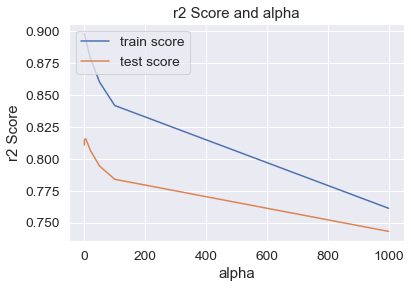

In [196]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 Score')

plt.title("r2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [197]:
#optimum alpha
alpha = 5
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-4.90596934e-02,  5.39705481e-02,  1.45653085e-03, -2.94831935e-02,
        1.33226070e-02, -1.47608999e-04, -2.59468776e-02,  4.52452021e-02,
        1.78112000e-01,  5.10396499e-03,  1.81566252e-01,  6.14589989e-02,
        4.89427029e-03,  7.52372077e-02,  2.69503236e-02, -1.87315601e-02,
       -4.41298082e-02,  7.40983811e-02,  5.45869437e-02,  1.41672725e-01,
       -1.53128757e-02,  1.90201059e-02, -1.52685490e-02,  1.33438758e-02,
        3.05827584e-02,  4.49256155e-02,  1.20797714e-02, -1.17179100e-02,
       -1.71744348e-03, -1.08588647e-01, -3.11009347e-02,  1.05808666e-03,
        1.03059488e-02, -4.33585869e-02,  7.49559723e-02, -1.37401404e-01,
        6.10615631e-02, -8.95275494e-04,  4.45273190e-02, -4.76385303e-02,
       -1.76025843e-01,  7.42895341e-02,  8.64629669e-02,  4.41388776e-03,
        1.51614266e-02, -2.65450010e-03, -4.87354827e-02,  3.62297906e-02,
        1.14751177e-02, -8.00080316e-02,  1.06455248e-01, -2.84470774e-02,
       -1.38357163e-01, -

In [198]:
ridge.score(X_train,y_train)

0.8902215924773625

In [199]:
ridge.score(X_test,y_test)

0.8787308696481549

In [200]:
# ridge coefficients
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col = col.insert(0,'Constant')
rCoef=list(zip(col,model_parameter))

In [201]:
r_coef = pd.DataFrame(rCoef)
r_coef.columns=['Features','CoefValues']
r_coef.sort_values('CoefValues',ascending=False)


,Features,CoefValues
87,OverallQual_Excellent,0.701
68,Neighborhood_NoRidge,0.445
75,Neighborhood_StoneBr,0.424
90,OverallQual_Very Good,0.305
69,Neighborhood_NridgHt,0.280
...,...,...
152,KitchenQual_Gd,-0.210
153,KitchenQual_TA,-0.234
60,Neighborhood_Edwards,-0.257
128,BsmtQual_TA,-0.279


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

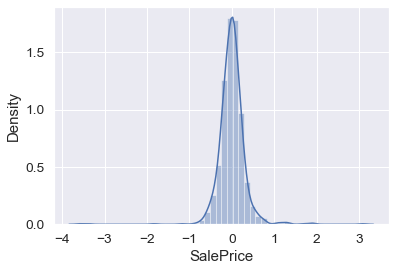

In [202]:
res=y_train-ridge.predict(X_train)
sns.distplot(res)

In [203]:
# list of alphas to tune
params = {'alpha': [0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1]}

### Lasso 

In [204]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    9.8s finished


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005,
                                   0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]},
             return_train_score=True, scoring='r2', verbose=1)

In [205]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.142514,0.031139,0.008204,0.003773,0.0001,{'alpha': 0.0001},0.789461,0.923153,0.669161,0.504855,8.450281e-01,0.894531,0.833647,0.913925,0.873042,0.890210,0.813701,0.124971,5,0.901633,0.889912,0.908751,0.917385,0.896032,0.891845,0.896029,0.890062,0.893850,0.891977,0.897747,0.008553
1,0.225784,0.031836,0.009654,0.000805,0.0002,{'alpha': 0.0002},0.789704,0.924243,0.669552,0.502700,8.488019e-01,0.897626,0.834685,0.916292,0.877476,0.890871,0.815195,0.126308,3,0.901207,0.889525,0.908381,0.916940,0.895612,0.891453,0.895671,0.889714,0.893462,0.891580,0.897355,0.008538
2,0.158513,0.054873,0.007042,0.004243,0.0005,{'alpha': 0.0005},0.787581,0.924758,0.668607,0.491246,8.549739e-01,0.903029,0.837421,0.918808,0.886136,0.890590,0.816315,0.130548,1,0.899445,0.887702,0.906678,0.915122,0.893669,0.889614,0.893895,0.887662,0.891631,0.889797,0.895522,0.008578
3,0.082070,0.014685,0.007844,0.003535,0.001,{'alpha': 0.001},0.788045,0.923392,0.668445,0.468256,8.623979e-01,0.908929,0.841141,0.921572,0.888960,0.889760,0.816090,0.137238,2,0.895652,0.883532,0.903270,0.911589,0.889251,0.885373,0.889841,0.883801,0.887249,0.886108,0.891567,0.008801
4,0.057585,0.010217,0.005428,0.004501,0.002,{'alpha': 0.002},0.787799,0.923149,0.671365,0.437259,8.688349e-01,0.913285,0.840719,0.926611,0.888478,0.889017,0.814652,0.145708,4,0.887360,0.876769,0.896363,0.905879,0.880753,0.877265,0.882207,0.876351,0.879415,0.878719,0.884108,0.009282
5,0.028956,0.005483,0.006237,0.004447,0.005,{'alpha': 0.005},0.769859,0.915858,0.659542,0.385633,8.692873e-01,0.904183,0.833994,0.920191,0.875846,0.875951,0.801034,0.157647,6,0.866751,0.856472,0.877142,0.887848,0.859413,0.856378,0.863991,0.855925,0.860306,0.857495,0.864172,0.010028
6,0.021148,0.002578,0.003421,0.004409,0.01,{'alpha': 0.01},0.745108,0.902049,0.632994,0.335715,8.475219e-01,0.883169,0.826163,0.895872,0.861232,0.864324,0.779415,0.167206,7,0.839155,0.827930,0.848424,0.867655,0.827717,0.828146,0.834787,0.824962,0.833502,0.832045,0.836432,0.012268
7,0.020143,0.003598,0.005637,0.004299,0.02,{'alpha': 0.02},0.726029,0.871109,0.612754,0.313901,8.182572e-01,0.853576,0.802795,0.861052,0.858477,0.844944,0.756289,0.165878,8,0.804374,0.790979,0.812884,0.840293,0.793032,0.792835,0.799720,0.791966,0.797969,0.794008,0.801806,0.014359
8,0.015322,0.004862,0.006844,0.004515,0.05,{'alpha': 0.05},0.723825,0.815135,0.546380,0.317272,7.618365e-01,0.787408,0.777979,0.806337,0.822295,0.794152,0.715262,0.153051,9,0.744357,0.734434,0.755620,0.791412,0.737269,0.734709,0.739628,0.733789,0.735868,0.732683,0.743977,0.017099
9,0.014696,0.004316,0.006036,0.003810,0.1,{'alpha': 0.1},0.707674,0.787334,0.532700,0.369671,7.291826e-01,0.741034,0.739805,0.764528,0.797113,0.751662,0.692070,0.128276,10,0.702731,0.701084,0.727137,0.761069,0.703312,0.702089,0.705131,0.699761,0.703971,0.700977,0.710726,0.018391


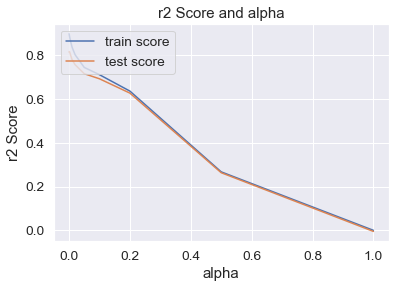

In [206]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 Score')

plt.title("r2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [207]:
#optimum alpha
alpha =0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [208]:
lasso.coef_

array([-5.09822340e-02,  5.53482764e-02, -3.37570775e-03, -2.48762417e-02,
        7.64789072e-03, -0.00000000e+00, -2.25544233e-03,  0.00000000e+00,
        1.18883514e-01, -3.41642319e-03,  2.15878949e-01,  6.17089960e-02,
        5.13676907e-03,  7.38028516e-02,  2.65987782e-02, -1.24172217e-02,
       -4.43759600e-02,  7.66701431e-02,  5.62850744e-02,  1.29912026e-01,
       -1.21625629e-02,  1.49801546e-02, -1.66294714e-02,  1.05407811e-02,
        3.16162340e-02,  4.37251638e-02,  9.96524482e-03, -1.14832561e-02,
       -0.00000000e+00, -9.95079346e-02, -3.79138225e-02,  0.00000000e+00,
        2.44470379e-03, -9.84853593e-03,  1.00548944e-01, -1.17468346e-01,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -2.50265766e-02,
       -1.76751985e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.55611268e-02,  2.32638619e-02,
        8.28706364e-03, -7.01623214e-02,  9.82721003e-02, -1.77693820e-02,
       -1.14419904e-01, -

In [209]:
lasso.score(X_train,y_train)

0.8877848585657777

In [210]:
lasso.score(X_test,y_test)

0.8813335846015165

In [211]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_train.columns
cols = cols.insert(0, "constant")
lCoef=list(zip(cols, model_parameters))

In [212]:
l_coef = pd.DataFrame(lCoef)
l_coef.columns=['Features','CoefValues']
l_coef.sort_values('CoefValues',ascending=False)

,Features,CoefValues
87,OverallQual_Excellent,0.913
68,Neighborhood_NoRidge,0.559
75,Neighborhood_StoneBr,0.520
90,OverallQual_Very Good,0.373
69,Neighborhood_NridgHt,0.337
...,...,...
60,Neighborhood_Edwards,-0.184
89,OverallQual_Others,-0.186
127,BsmtQual_Others,-0.233
128,BsmtQual_TA,-0.280


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

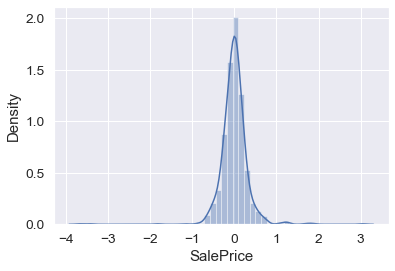

In [213]:
sns.distplot(y_train-lasso.predict(X_train))

- Final Result

## Ridge Regression
1. Optimal Value of alpha = 5
2. Important Predictor =>  OverallQual_Excellent - 0.701

## Lasso Regression                                                                                                               
1. Optimal Value of alpha = 0.001
2. Important Predictor =>  OverallQual_Excellent - 0.913